# DATA EXPLORATION

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns


## Load datasets and merge them to form a single consolidated dataset

In [2]:
sales_data=pd.read_csv("superstore sales dataset.csv")
population=sales_data[['State','Population']].drop_duplicates()
pd.set_option('display.float_format', '{:.2f}'.format)
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Population
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,3464802
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,3464802
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,30617582
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,17247808
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,17247808


## Add engineered data columns to the existing sales dataset of a superstore - Order Month, Order Year, Profit margin, Gross Sales, Unit Cost Price

In [3]:
sales_data['Order month'] = pd.to_datetime(sales_data['Order Date']).dt.month_name()
sales_data['Order year'] = pd.to_datetime(sales_data['Order Date']).dt.year
sales_data['Profit Margin %'] = (sales_data.Profit / sales_data.Sales) * 100
sales_data['Gross Sales']= sales_data['Sales']/(1-sales_data['Discount'])
sales_data['Unit Cost Price']=(sales_data['Sales']-sales_data['Profit'])/(sales_data['Quantity']*(1-sales_data['Discount']))
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Population,Order month,Order year,Profit Margin %,Gross Sales,Unit Cost Price
0,1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.96,2,0.00,41.91,3464802,November,2016,16.00,261.96,110.02
1,2,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.94,3,0.00,219.58,3464802,November,2016,30.00,731.94,170.79
2,3,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.62,2,0.00,6.87,30617582,June,2016,47.00,14.62,3.87
3,4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.58,5,0.45,-383.03,17247808,October,2015,-40.00,1741.05,487.49
4,5,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.37,2,0.20,2.52,17247808,October,2015,11.25,27.96,12.41


In [4]:
#Smmarized info of the dataset
sales_data.info()

#shaoe of the dataset
print("The shape of the dataset is ",sales_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           9994 non-null   int64  
 1   Order ID         9994 non-null   object 
 2   Order Date       9994 non-null   object 
 3   Ship Date        9994 non-null   object 
 4   Ship Mode        9994 non-null   object 
 5   Customer ID      9994 non-null   object 
 6   Customer Name    9994 non-null   object 
 7   Segment          9994 non-null   object 
 8   Country          9994 non-null   object 
 9   City             9994 non-null   object 
 10  State            9994 non-null   object 
 11  Postal Code      9994 non-null   int64  
 12  Region           9994 non-null   object 
 13  Product ID       9994 non-null   object 
 14  Category         9994 non-null   object 
 15  Sub-Category     9994 non-null   object 
 16  Product Name     9994 non-null   object 
 17  Sales         

# DATA CLEANING

## Drop Data columns representing IDs and constants

In [5]:
sales_data.drop('Row ID',axis=1,inplace=True)
sales_data.drop('Order ID',axis=1,inplace=True)
sales_data.drop('Country',axis=1,inplace=True)
sales_data.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,Sales,Quantity,Discount,Profit,Population,Order month,Order year,Profit Margin %,Gross Sales,Unit Cost Price
0,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,...,261.96,2,0.00,41.91,3464802,November,2016,16.00,261.96,110.02
1,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,...,731.94,3,0.00,219.58,3464802,November,2016,30.00,731.94,170.79
2,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,...,14.62,2,0.00,6.87,30617582,June,2016,47.00,14.62,3.87
3,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,...,957.58,5,0.45,-383.03,17247808,October,2015,-40.00,1741.05,487.49
4,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,...,22.37,2,0.20,2.52,17247808,October,2015,11.25,27.96,12.41


In [6]:
#Checking for Datatypes
sales_data.dtypes

Order Date          object
Ship Date           object
Ship Mode           object
Customer ID         object
Customer Name       object
Segment             object
City                object
State               object
Postal Code          int64
Region              object
Product ID          object
Category            object
Sub-Category        object
Product Name        object
Sales              float64
Quantity             int64
Discount           float64
Profit             float64
Population           int64
Order month         object
Order year           int64
Profit Margin %    float64
Gross Sales        float64
Unit Cost Price    float64
dtype: object

## Handling Missing Values

In [7]:
#Check for missing values
sales_data.isnull().sum()

Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
City               0
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
Population         0
Order month        0
Order year         0
Profit Margin %    0
Gross Sales        0
Unit Cost Price    0
dtype: int64

In [8]:
sales_data[sales_data['Postal Code'].isnull()]

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,Sales,Quantity,Discount,Profit,Population,Order month,Order year,Profit Margin %,Gross Sales,Unit Cost Price


#### The result shows that the data set does not have any null value.

## Duplicate Data

In [9]:
#searching for duplicated value and remove them (if any)
sales_data.duplicated().sum()


1

In [10]:
#Show Duplicated row
sales_data[sales_data.duplicated(keep = 'last')]

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,Sales,Quantity,Discount,Profit,Population,Order month,Order year,Profit Margin %,Gross Sales,Unit Cost Price
3405,4/23/14,4/27/14,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,...,281.37,2,0.30,-12.06,9111081,April,2014,-4.29,401.96,209.59


In [11]:
# Drop the duplicated rows
sales_data.drop_duplicates(inplace = True)
# Find the no. of rows and columns
sales_data.shape


(9993, 24)

# Descriptive statistics

In [12]:
sales_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Population,Order year,Profit Margin %,Gross Sales,Unit Cost Price
count,9993.00,9993.00,9993.00,9993.00,9993.00,9993.00,9993.00,9993.00,9993.00,9993.00
mean,55191.58,229.85,3.79,0.16,28.66,14175858.39,2015.72,12.03,286.55,73.64
std,32065.07,623.28,2.23,0.21,234.27,9880420.11,1.12,46.68,864.14,228.35
min,1040.00,0.44,1.00,0.00,-6599.98,445025.00,2014.00,-275.00,0.99,0.54
25%,23223.00,17.28,2.00,0.00,1.73,5951832.00,2015.00,7.50,21.36,4.37
50%,56560.00,54.48,3.00,0.20,8.67,10167376.00,2016.00,27.00,64.96,16.23
75%,90008.00,209.94,5.00,0.20,29.36,21596071.00,2017.00,36.25,251.91,69.99
max,99301.00,22638.48,14.00,0.80,8399.98,30617582.00,2017.00,50.00,45276.96,8149.85


In [13]:
sales_data.describe(include='object')

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Order month
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993
unique,1237,1334,4,793,793,3,531,49,4,1862,3,17,1850,12
top,9/5/16,12/16/15,Standard Class,WB-21850,William Brown,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,November
freq,38,35,5967,37,37,5191,915,2001,3203,19,6026,1523,48,1471


# Exploratory Data Analysis

## 1. Which Category is Best Selling and Most Profitable?

In [14]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(sales_data.groupby(['Category'])[['Gross Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Gross Sales,Profit,Quantity
Category,,,
Furniture,926837.43,18463.33,8026
Office Supplies,898283.53,122490.80,22906
Technology,1038412.12,145454.95,6939


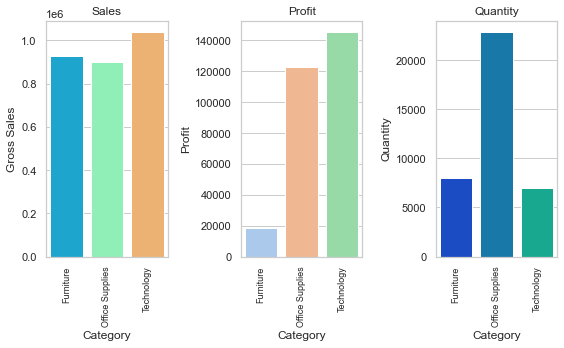

In [15]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis['Gross Sales'], ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

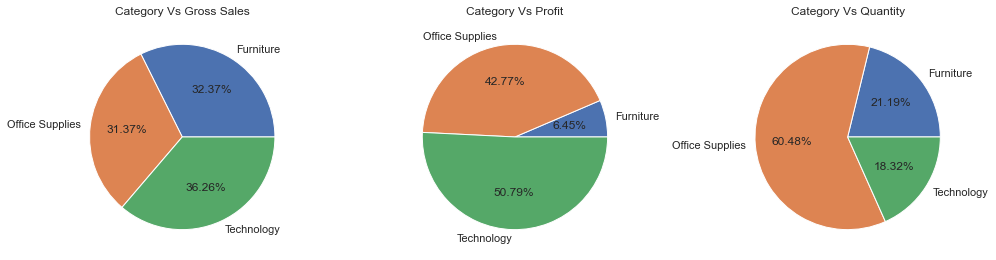

In [16]:
# Set for grouped plots - figure with a 2x2 grid of Axes
figure, axis = plt.subplots(1, 3, figsize=(14, 6))
# Plot pieplots
#plot1
plt.subplot(1,3,1)
pie1= plt.pie(category_analysis['Gross Sales'],labels=category_analysis.index,autopct='%.2f%%')
plt.gca().set_title('Category Vs Gross Sales')
#plot2
plt.subplot(1,3,2)
pie2= plt.pie(category_analysis.Profit, labels=category_analysis.index,autopct='%.2f%%')
plt.gca().set_title('Category Vs Profit')

#plot3
plt.subplot(1,3,3)
pie3= plt.pie(category_analysis.Quantity,labels=category_analysis.index,autopct='%.2f%%')
plt.gca().set_title('Category Vs Quantity')

#Set spacing between subplots
figure.tight_layout()
plt.show()



## 2. What are the Best Selling and Most Profitable Sub-Category?

In [17]:
# Group by sub-category
subcat_analysis = pd.DataFrame(sales_data.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.05,44515.73
Chairs,328167.73,26602.23
Storage,223843.61,21278.83
Tables,206965.53,-17725.48
Binders,203412.73,30221.76
Machines,189238.63,3384.76
Accessories,167380.32,41936.64
Copiers,149528.03,55617.82
Bookcases,114880.00,-3472.56


In [18]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.03,55617.82
Phones,330007.05,44515.73
Accessories,167380.32,41936.64
Paper,78479.21,34053.57
Binders,203412.73,30221.76
Chairs,328167.73,26602.23
Storage,223843.61,21278.83
Appliances,107532.16,18138.01
Furnishings,91705.16,13059.14


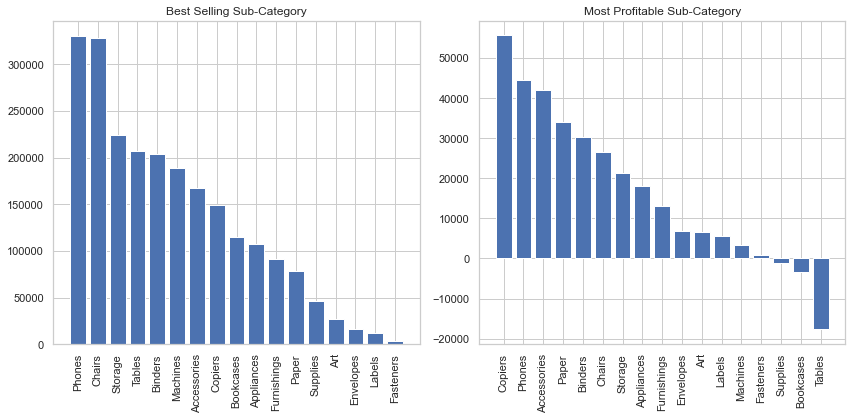

In [19]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
plt.subplot(1,2,1)
subcat1 = plt.bar(subcat_sales.index,subcat_sales.Sales)
plt.gca().set_title("Best Selling Sub-Category")
plt.xticks(rotation = 90)
# Plot Bar Plot for Most Profitable Sub-Category
plt.subplot(1,2,2)
subcat2 = plt.bar(subcat_profit.index,subcat_profit.Profit)
plt.gca().set_title("Most Profitable Sub-Category")
plt.xticks(rotation = 90)
# Set spacing between subplots
figure.tight_layout()
plt.show()



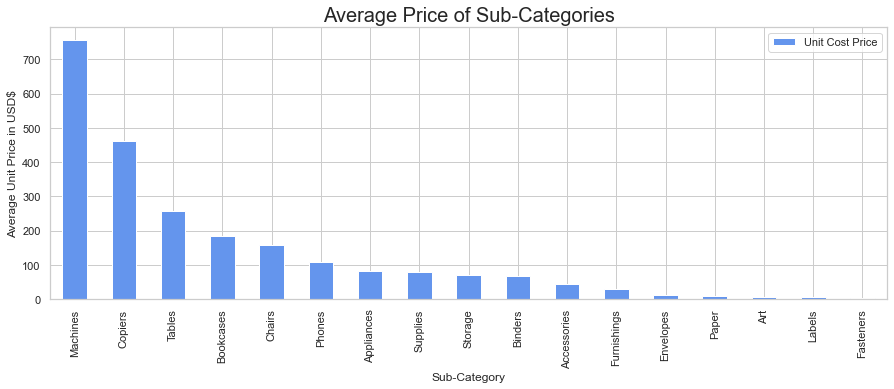

In [20]:
# Unit Price of Sub-Category
df_subcategory = sales_data.groupby(['Sub-Category'])[['Gross Sales', 'Discount', 'Profit', 'Unit Cost Price']].mean()
df_subcategory.sort_values('Unit Cost Price', ascending = False)[['Unit Cost Price']].plot(kind = 'bar',
                                                                                 figsize = (15, 5),
                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Unit Price in USD$')
plt.xlabel('Sub-Category')
plt.title('Average Price of Sub-Categories', fontsize = 20)
plt.show()

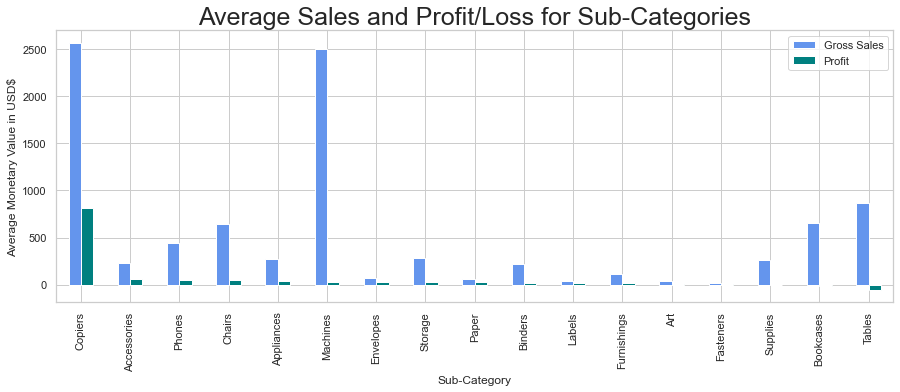

In [21]:
colors = ['Cornflowerblue', 'Teal']
# Average Sales and profit/loss for Sub-Category
df_subcategory.sort_values('Profit', ascending = False)[['Gross Sales', 'Profit']].plot(kind = 'bar',
                                                                                  figsize = (15, 5),
                                                                                  color = colors)

plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Sub-Category')
plt.title('Average Sales and Profit/Loss for Sub-Categories', fontsize = 25)
plt.show()

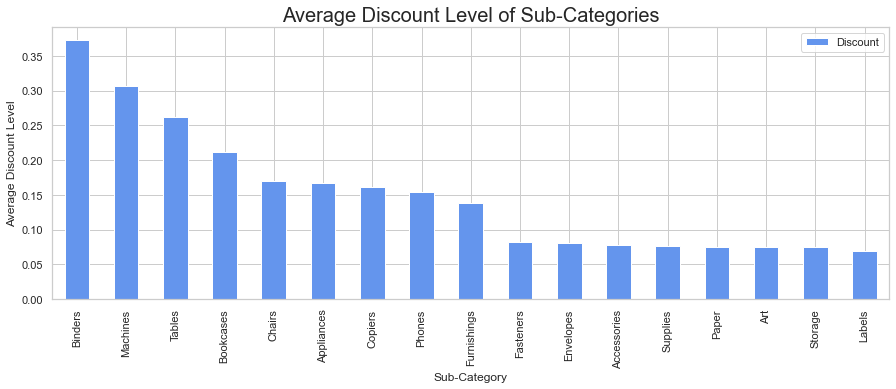

In [22]:
# Discount of Sub-Category
df_subcategory.sort_values('Discount', ascending = False)[['Discount']].plot(kind = 'bar',
                                                                             figsize = (15, 5),
                                                                             color = 'Cornflowerblue')
plt.ylabel('Average Discount Level')
plt.xlabel('Sub-Category')
plt.title('Average Discount Level of Sub-Categories', fontsize = 20)
plt.show()

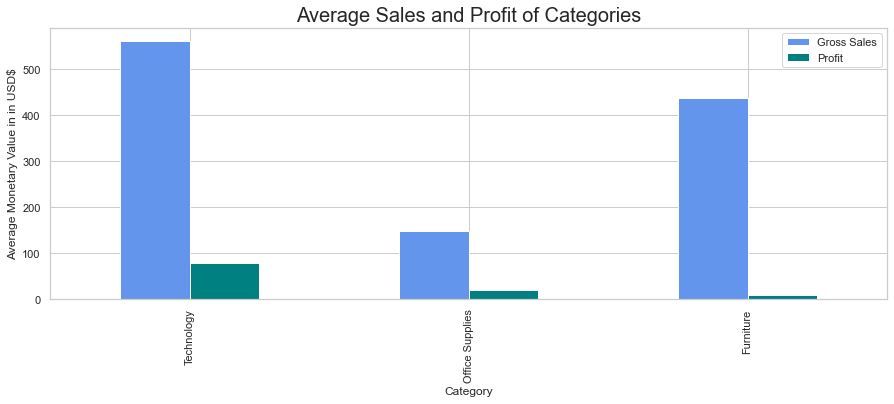

In [23]:
# average Sales and Profit of Category
df_category = sales_data.groupby(['Category'])[['Gross Sales', 'Discount', 'Profit', 'Unit Cost Price']].mean()
df_category.sort_values('Profit', ascending = False)[["Gross Sales", "Profit"]].plot(kind = 'bar',
                                                                               figsize = (15, 5),
                                                                               color = colors)

plt.ylabel('Average Monetary Value in in USD$')
plt.xlabel('Category')
plt.title('Average Sales and Profit of Categories', fontsize = 20)
plt.show()

## 3. Which is the Top Selling Sub-Category?

In [24]:
subcat_quantity = pd.DataFrame(sales_data.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2354
Appliances,1729


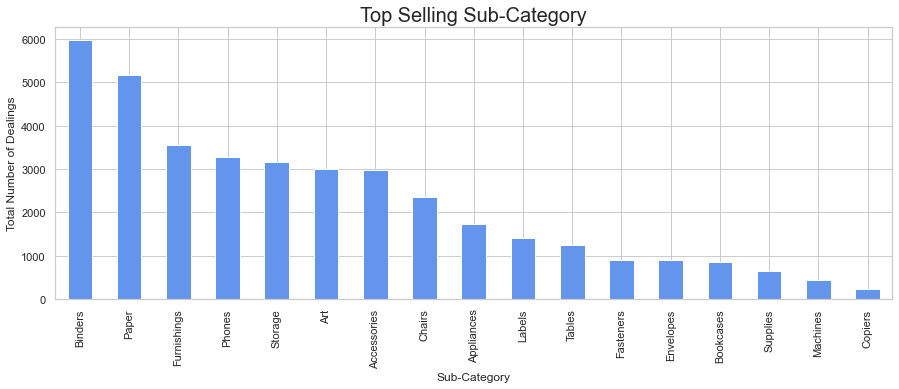

In [25]:
# Plot Bar Plot for Top Selling Sub-Category
# total dealings for each Sub-Category
subcat_quantity = sales_data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                        color = 'Cornflowerblue')
plt.ylabel('Total Number of Dealings')
plt.xlabel('Sub-Category')
plt.title('Top Selling Sub-Category', fontsize = 20)
plt.show()



## 4. Which Customer Segment is Most Profitable?

In [26]:
segment_analysis = pd.DataFrame(sales_data.groupby(['Segment'])[['Profit']].sum())
segment_analysis
Top_segment = sales_data.groupby(["Segment"]).sum().sort_values("Gross Sales", ascending=False) 
Top_segment = Top_segment[["Gross Sales"]] 
Top_segment.reset_index(inplace=True) 
total_revenue_segement = Top_segment["Gross Sales"].sum() 
total_revenue_segement = str(int(total_revenue_segement)) 
total_revenue_segement= '$' + total_revenue_segement
total_revenue_segement
Top_segment_profit=sales_data.groupby(["Segment"]).sum().sort_values("Profit", ascending=False).reset_index()
Top_segment_profit


,Segment,Postal Code,Sales,Quantity,Discount,Profit,Population,Order year,Profit Margin %,Gross Sales,Unit Cost Price
0,Consumer,288878609,1161401.34,19521,820.91,134119.21,74557934508,10463459,58164.91,1456471.75,384743.75
1,Corporate,164536330,706146.37,11608,477.85,91979.13,43244293522,6087442,36603.19,863995.67,218704.64
2,Home Office,98114484,429371.78,6742,262.03,60310.74,23857124896,3592213,25477.93,543065.66,132472.53


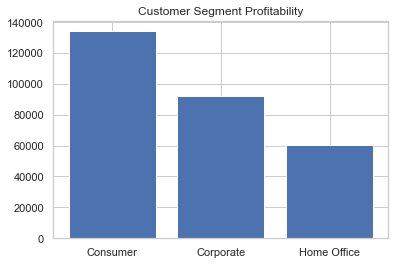

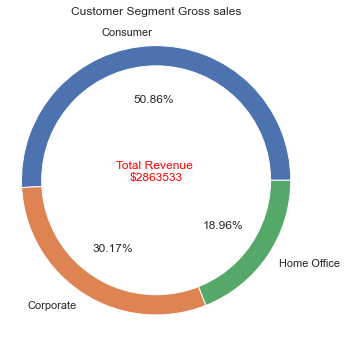

In [27]:
# Plot Bar Plot for profit

plt.bar(segment_analysis.index,segment_analysis.Profit)
plt.gca().set_title("Customer Segment Profitability")
plt.show()
#Plot Pie plot for sales

plt.rcParams["figure.figsize"] = (5,5) 
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_segment['Gross Sales'], labels=Top_segment['Segment'], autopct='%.2f%%')
centre_circle = plt.Circle((0,0),0.85,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.gca().set_title("Customer Segment Gross sales")
label = ax1.annotate('Total Revenue \n'+str(total_revenue_segement),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

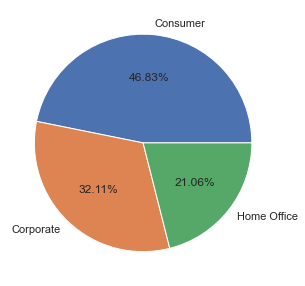

In [28]:
plt.rcParams["figure.figsize"] = (5,5) 
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_segment_profit['Profit'], labels=Top_segment_profit['Segment'], autopct='%.2f%%')
centre_circle = plt.Circle((0,0),0.85,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()

## 5. Which is the Preferred Ship Mode?

/Users/manojpadmaraju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


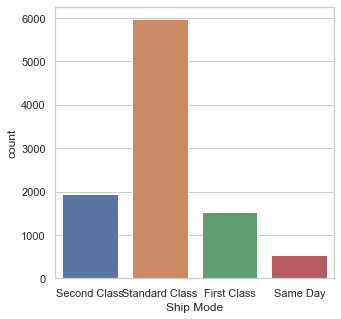

In [29]:
# Plot shipment mode
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(sales_data['Ship Mode'])
plt.show()

In [30]:
#Profitability against shipmode
shipmode_analysis = pd.DataFrame(sales_data.groupby(['Ship Mode'])[['Gross Sales', 'Profit', 'Quantity']].sum())
shipmode_analysis

,Gross Sales,Profit,Quantity
Ship Mode,,,
First Class,442845.13,48969.84,5693
Same Day,160540.39,15891.76,1960
Second Class,548305.56,57446.64,7423
Standard Class,1711842.00,164100.85,22795


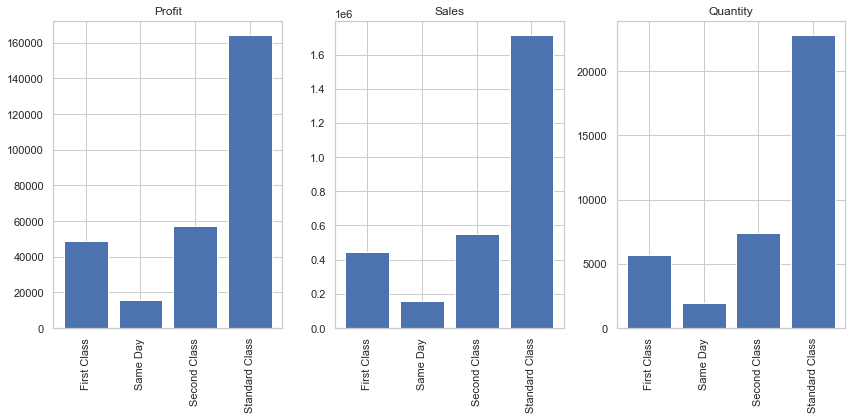

In [31]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 3, figsize=(12, 6))
# Plot Bar Plot for shipmode Vs profitabilty
plt.subplot(1,3,1)
shipmode1 = plt.bar(shipmode_analysis.index,shipmode_analysis.Profit)
plt.gca().set_title("Profit")
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
shipmode2 = plt.bar(shipmode_analysis.index,shipmode_analysis['Gross Sales'])
plt.gca().set_title("Sales")
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
shipmode3 = plt.bar(shipmode_analysis.index,shipmode_analysis.Quantity)
plt.gca().set_title("Quantity")
plt.xticks(rotation = 90)
# Set spacing between subplots
figure.tight_layout()
plt.show()



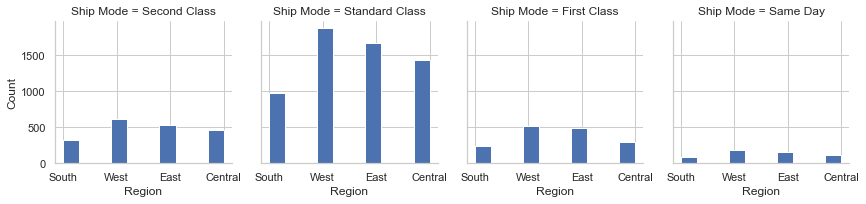

In [32]:
region_hist = sns.FacetGrid(sales_data, col='Ship Mode', palette='rainbow')
region_hist.map(plt.hist, 'Region')
region_hist.set_ylabels('Count')

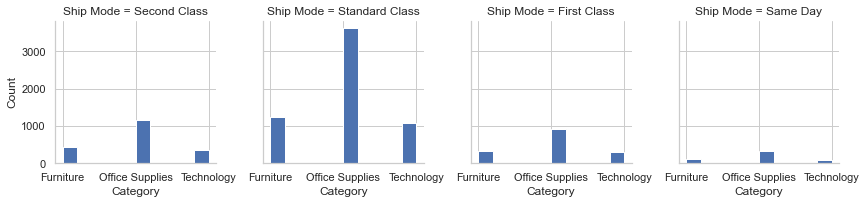

In [33]:
category_hist = sns.FacetGrid(sales_data, col='Ship Mode', palette='rainbow')
category_hist.map(plt.hist, 'Category')
category_hist.set_ylabels('Count')

## 6. Which Region is the Most Profitable?

In [34]:
region_analysis = pd.DataFrame(sales_data.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.36
1,East,91534.84
2,South,46749.43
3,West,108418.45


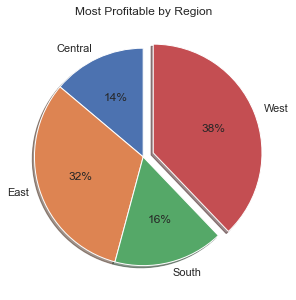

In [35]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.gca().set_title("Most Profitable by Region")
plt.show()

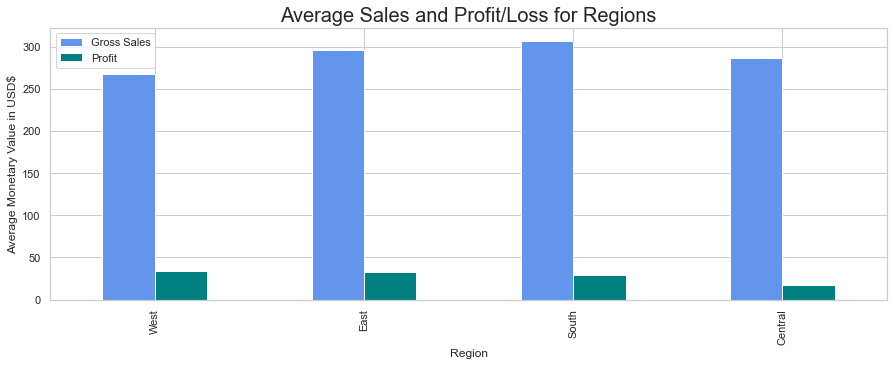

In [36]:
# average Sales and profit/loss for Region
colors = ['Cornflowerblue', 'Teal']
df_region = sales_data.groupby(['Region'])[['Gross Sales', 'Discount', 'Profit']].mean()
df_region.sort_values('Profit', ascending = False)[['Gross Sales', 'Profit']].plot(kind = 'bar',
                                                                             figsize = (15, 5),
                                                                             color = colors)

plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Region')
plt.title('Average Sales and Profit/Loss for Regions', fontsize = 20)
plt.show()

## 7. Which City has the Highest Number of Sales?

In [37]:
# Gross Sales is considered to nullify the impact of discounts
city_sales = pd.DataFrame(sales_data.groupby(['City'])['Gross Sales', 'Quantity'].sum().sort_values('Gross Sales',ascending = False)).reset_index()
city_sales['Gross Sales']=city_sales['Gross Sales'].round(2)
top10 = city_sales[:10]
top10


/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/1629210011.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales = pd.DataFrame(sales_data.groupby(['City'])['Gross Sales', 'Quantity'].sum().sort_values('Gross Sales',ascending = False)).reset_index()


,City,Gross Sales,Quantity
0,New York City,282715.28,3417
1,Los Angeles,202989.82,2879
2,Philadelphia,173612.59,1981
3,Seattle,130463.28,1590
4,San Francisco,128758.09,1935
5,Houston,109824.10,1466
6,Chicago,81347.45,1132
7,Jacksonville,76443.36,429
8,San Diego,55597.38,670
9,Springfield,49812.11,649


In [38]:
bottom10 = city_sales[-10:]
bottom10

,City,Gross Sales,Quantity
521,Port Orange,9.78,1
522,Ormond Beach,9.36,3
523,Keller,7.50,2
524,Pensacola,7.38,3
525,Abilene,6.96,2
526,Elyria,6.08,1
527,Layton,4.96,4
528,Springdale,4.30,2
529,San Luis Obispo,3.62,2
530,Jupiter,2.58,1


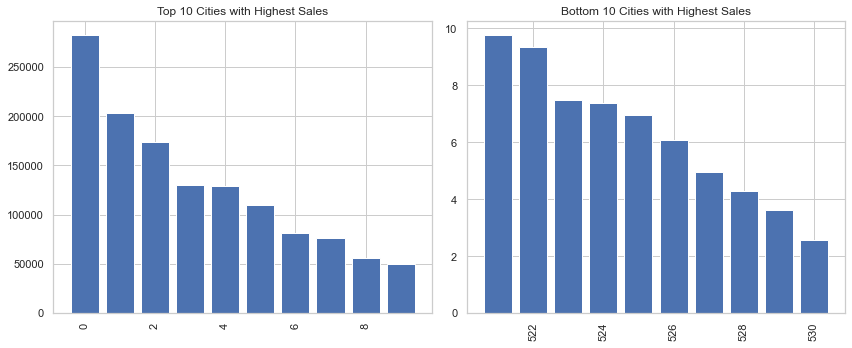

In [39]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1,2,1)
top10c = plt.bar(top10.index,top10['Gross Sales'])
plt.gca().set_title ("Top 10 Cities with Highest Sales")
plt.xticks(rotation = 90)
# Plot Bar Plot for Best Selling Sub-Category
plt.subplot(1,2,2)
top10c = plt.bar(bottom10.index,bottom10['Gross Sales'])
plt.gca().set_title ("Bottom 10 Cities with Highest Sales")
plt.xticks(rotation = 90)
# Set spacing between subplots
figure.tight_layout()
plt.show()


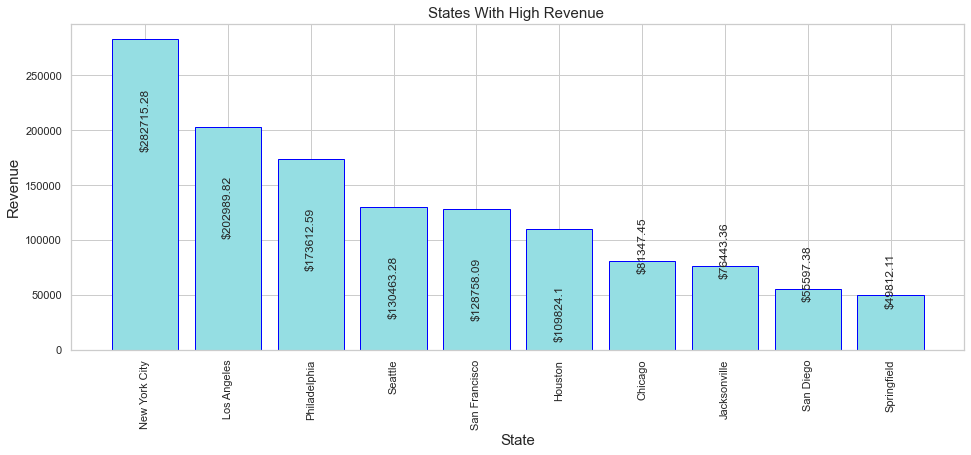

In [40]:
plt.figure(figsize=(16,6))
plt.bar(top10['City'],top10['Gross Sales'] ,color="#95dee3" , edgecolor='blue')
plt.xticks(rotation='vertical')
plt.title('States With High Revenue ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenue',fontsize=15)

for k , v in top10['Gross Sales'].items(): 
    if v > 100000 : 
        plt.text(k,v-100000,"$"+str(v),rotation=90,horizontalalignment='center')
    else:
        plt.text(k,v-10000,"$"+str(v),rotation=90,horizontalalignment='center')

Text(0, 0.5, 'Gross Sales')

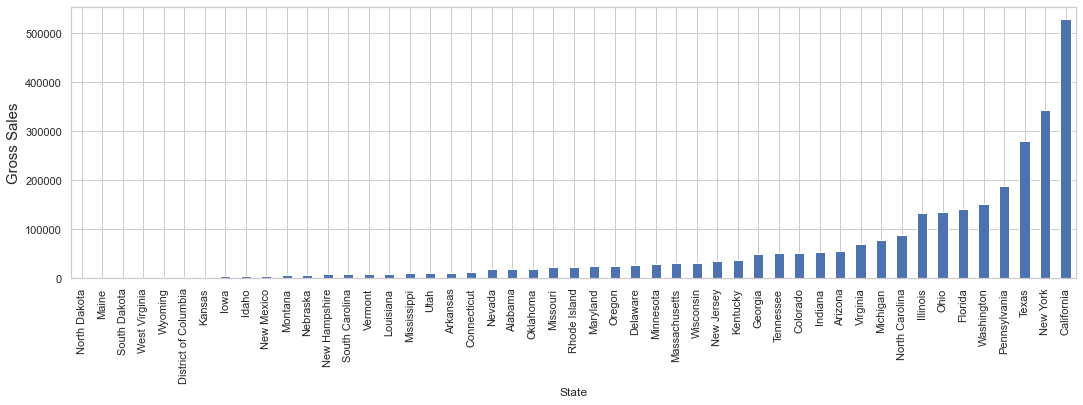

In [41]:
sales_data.groupby(['State']).sum()['Gross Sales'].sort_values().plot(kind='bar', figsize=(18,5))
plt.ylabel('Gross Sales',fontsize=15)

## 8. Variation of profitability statewise

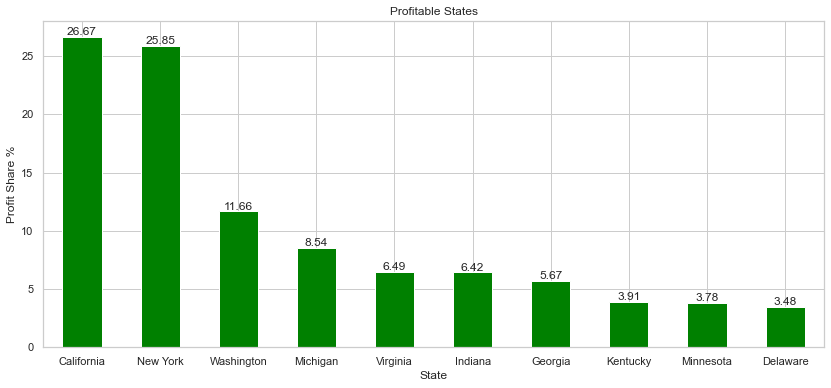

,Postal Code,Sales,Quantity,Discount,Profit,Population,Order year,Profit Margin %,Gross Sales,Unit Cost Price
State,,,,,,,,,,
California,184382639,457687.63,7667,145.60,76381.39,61265781582,4033452,55694.65,527300.61,117844.97
New York,11835721,310876.27,4224,62.40,74038.55,17399695536,2273750,33655.67,343352.34,72753.39
Washington,49661687,138641.27,1883,32.40,33402.65,3011626992,1020048,13983.50,151068.95,31214.99
Michigan,12356103,76269.61,946,1.80,24463.19,1999945620,513982,8501.44,77129.07,15027.02
Virginia,5124335,70636.72,893,0.00,18597.95,1495126304,451437,7437.00,70636.72,12668.82
Indiana,6991602,53555.36,578,0.00,18382.94,769472505,300375,5183.00,53555.36,8628.87
Georgia,5685480,49095.84,705,0.00,16250.04,1492891728,370908,6352.00,49095.84,8595.85
Kentucky,5725336,36591.75,523,0.00,11199.70,481607478,280179,4630.00,36591.75,6608.45
Minnesota,4932224,29863.15,331,0.00,10823.19,385946275,179396,3186.00,29863.15,5304.16


In [42]:
#State and Profits
all_states = sales_data.groupby('State').sum().sort_values('Profit',ascending=False)
profitable_states = sales_data.groupby('State').sum().sort_values('Profit',ascending=False)[:10]
plt.figure(figsize=(14,6))
#Share of profits
total_profit = all_states['Profit'].sum()
profitable_states['Profit_Share'] = ((profitable_states['Profit']/total_profit)*100).round(2)
profitshare_state_plot = profitable_states['Profit_Share'].plot(kind='bar',color='green')
plt.gca().set_title('Profitable States')
plt.xlabel("State")
plt.ylabel('Profit Share %')
plt.xticks(rotation='horizontal')
profitshare_state_plot.bar_label(profitshare_state_plot.containers[0])
plt.show()
all_states


[Text(0, 0, '-8.98'),
 Text(0, 0, '-5.92'),
 Text(0, 0, '-5.43'),
 Text(0, 0, '-4.4'),
 Text(0, 0, '-2.62'),
 Text(0, 0, '-2.28'),
 Text(0, 0, '-1.87'),
 Text(0, 0, '-1.2'),
 Text(0, 0, '-1.19'),
 Text(0, 0, '-0.42')]

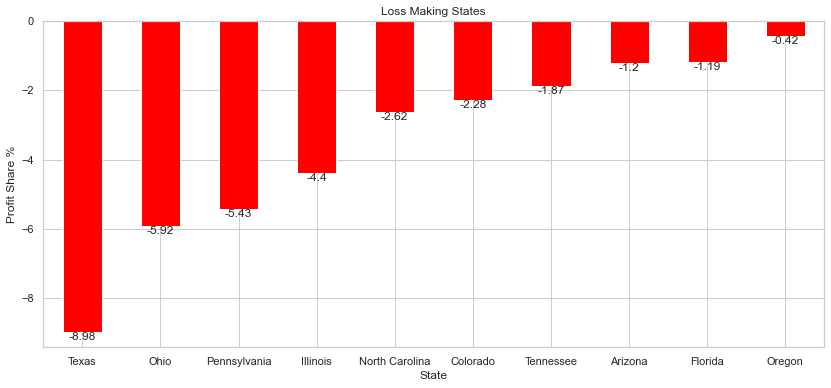

In [43]:
#State and Profits
non_profitable_states = sales_data.groupby('State').sum().sort_values('Profit')[:10]
plt.figure(figsize=(14,6))
#Share of profits
total_profit = all_states['Profit'].sum()
non_profitable_states['Profit_Share'] = ((non_profitable_states['Profit']/total_profit)*100).round(2)
lossshare_state_plot = non_profitable_states['Profit_Share'].plot(kind='bar',color='red')
plt.gca().set_title('Loss Making States')
plt.xlabel("State")
plt.ylabel('Profit Share %')
plt.xticks(rotation='horizontal')
lossshare_state_plot.bar_label(lossshare_state_plot.containers[0])

#### The most profitable state is California as opposed to Texas which is the least profitable

In [44]:
# Gross Sales is considered to nullify the impact of discounts
state_sales = pd.DataFrame(sales_data.groupby(['State'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
topstates = state_sales[:10]
topstates

/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/2905277412.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_sales = pd.DataFrame(sales_data.groupby(['State'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))


,Sales,Quantity
State,,
California,457687.63,7667
New York,310876.27,4224
Texas,170188.05,3724
Washington,138641.27,1883
Pennsylvania,116511.91,2153
Florida,89473.71,1379
Illinois,80166.10,1845
Ohio,77976.76,1757
Michigan,76269.61,946


In [45]:
bottomstates = state_sales[-10:]
bottomstates

,Sales,Quantity
State,,
New Mexico,4783.52,151
Iowa,4579.76,112
Idaho,4382.49,64
Kansas,2914.31,74
District of Columbia,2865.02,40
Wyoming,1603.14,4
South Dakota,1315.56,42
Maine,1270.53,35
West Virginia,1209.82,18


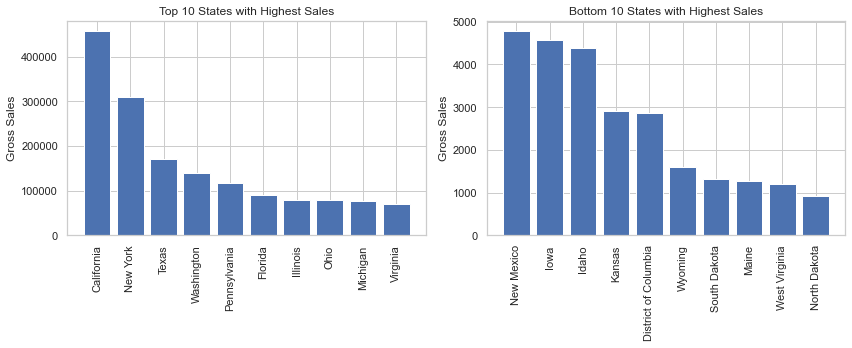

In [46]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1,2,1)
top10c = plt.bar(topstates.index,topstates['Sales'])
plt.gca().set_title ("Top 10 States with Highest Sales")
plt.xticks(rotation = 90)
plt.gca().set_ylabel('Gross Sales')

# Plot Bar Plot for Best Selling Sub-Category
plt.subplot(1,2,2)
bottom10c = plt.bar(bottomstates.index,bottomstates['Sales'])
plt.gca().set_title ("Bottom 10 States with Highest Sales")
plt.gca().set_ylabel('Gross Sales')
plt.xticks(rotation = 90)
# Set spacing between subplots
figure.tight_layout()
plt.show()


## 9. Analyzing loses

In [47]:
#Creating Loss DataFrame
loss_df=sales_data[sales_data['Profit'] < 0]
loss=loss_df[['Ship Mode','Region','Segment','Category','City','Sub-Category','State','Sales','Profit','Discount','Population','Gross Sales','Unit Cost Price']]
loss

,Ship Mode,Region,Segment,Category,City,Sub-Category,State,Sales,Profit,Discount,Population,Gross Sales,Unit Cost Price
3,Standard Class,South,Consumer,Furniture,Fort Lauderdale,Tables,Florida,957.58,-383.03,0.45,17247808,1741.05,487.49
14,Standard Class,Central,Home Office,Office Supplies,Fort Worth,Appliances,Texas,68.81,-123.86,0.80,21596071,344.05,192.67
15,Standard Class,Central,Home Office,Office Supplies,Fort Worth,Binders,Texas,2.54,-3.82,0.80,21596071,12.72,10.60
23,Second Class,East,Consumer,Furniture,Philadelphia,Chairs,Pennsylvania,71.37,-1.02,0.30,10167376,101.96,51.71
27,Standard Class,East,Consumer,Furniture,Philadelphia,Bookcases,Pennsylvania,3083.43,-1665.05,0.50,10167376,6166.86,1356.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Central,Corporate,Office Supplies,Bryan,Binders,Texas,22.39,-35.82,0.80,21596071,111.93,41.57
9921,Standard Class,East,Home Office,Office Supplies,Akron,Binders,Ohio,5.74,-4.59,0.70,9111081,19.14,11.48
9931,Standard Class,West,Consumer,Furniture,San Bernardino,Bookcases,California,683.33,-40.20,0.15,30617582,803.92,212.80
9937,Second Class,West,Corporate,Furniture,Los Angeles,Tables,California,71.09,-1.78,0.20,30617582,88.86,45.54


In [48]:
#calculate total loss
Total_loss=np.negative(loss['Profit'].sum())
print("Total loss = %.2f" %Total_loss)

Total loss = 156119.23


In [49]:
#calculate loss category-Subcategory wise
loss.groupby(['Category','Sub-Category']).sum()

Sales    Profit  Discount  Population  \
Category        Sub-Category                                             
Furniture       Bookcases     48072.74 -12152.21     37.99  1764554046   
                Chairs        91707.08  -9868.78     61.10  3788144420   
                Furnishings   12845.84  -6490.91     88.60  2577654364   
                Tables       104978.55 -32412.15     74.15  2973646744   
Office Supplies Appliances     3382.53  -8629.64     53.60  1212094257   
                Binders       36140.61 -38510.50    452.40  7728870652   
                Fasteners       149.28    -33.20      2.40   133696152   
                Storage       37869.07  -6426.30     32.20  1935764812   
                Supplies      14067.18  -3015.62      6.60   437483153   
Technology      Accessories   10958.80   -930.63     18.20  1156499708   
                Machines      72456.25 -30118.67     25.60   510672808   
                Phones        35797.84  -7530.62     46.60  1616232004   

                              Gross Sales  Unit Cost Price  
Category        Sub-Category                                
Furniture       Bookcases        74189.91         25225.03  
                Chairs          125704.55         37664.21  
                Furnishings      24363.18         10657.87  
                Tables          167788.45         59659.35  
Office Supplies Appliances       16912.67         16995.23  
                Binders         143104.08         68878.70  
                Fasteners          186.60            46.68  
                Storage          47336.34         15016.38  
                Supplies         17583.97          6744.50  
Technology      Accessories      13698.50          4293.63  
                Machines        159083.46         60146.45  
                Phones           58071.95         20140.98

In [50]:
#The below list shows the names of the top 10 cities where loss is high
loss.groupby(by='State').sum().sort_values('Profit',ascending=True).head(10)

,Sales,Profit,Discount,Population,Gross Sales,Unit Cost Price
State,,,,,,
Texas,102656.46,-36813.19,263.24,10495690506,193529.11,78100.34
Ohio,49526.25,-21737.94,98.40,1895104848,96701.20,43138.14
Pennsylvania,75792.23,-21602.85,128.10,2826530528,129945.19,44563.83
Illinois,38626.20,-19501.70,143.90,2512756230,80946.83,39787.99
North Carolina,28226.54,-11557.99,34.40,556741092,54120.89,19520.88
Colorado,12833.21,-8900.90,34.40,296948322,28397.24,13212.44
Florida,45694.13,-8689.83,63.25,2173223808,86353.12,23253.19
Tennessee,17714.51,-7257.02,29.70,345742995,36012.90,12094.87
Arizona,14179.05,-6656.77,40.20,479270885,28367.23,10962.12


In [51]:
#Category-wise loss analysis 
loss.sort_values(['Sales'],ascending=True).groupby(by='Category').mean()
#While calculating an average, we observed that more loss is in the technology category.

,Sales,Profit,Discount,Population,Gross Sales,Unit Cost Price
Category,,,,,,
Furniture,361.30,-85.45,0.37,15573631.94,549.85,186.83
Office Supplies,103.40,-63.90,0.62,12920890.55,254.09,121.54
Technology,439.90,-142.36,0.33,12115883.84,851.86,312.11


In [52]:
#These are the last 10 states where sales are very less
sales_data.groupby(['State']).sum()['Sales'].nsmallest(10)

State
North Dakota            919.91
West Virginia          1209.82
Maine                  1270.53
South Dakota           1315.56
Wyoming                1603.14
District of Columbia   2865.02
Kansas                 2914.31
Idaho                  4382.49
Iowa                   4579.76
New Mexico             4783.52
Name: Sales, dtype: float64

In [53]:
sales_data[['Segment','Sales','Quantity','Profit','Gross Sales','Unit Cost Price']].sort_values(['Segment'],ascending=True).groupby('Segment').sum()

,Sales,Quantity,Profit,Gross Sales,Unit Cost Price
Segment,,,,,
Consumer,1161401.34,19521,134119.21,1456471.75,384743.75
Corporate,706146.37,11608,91979.13,863995.67,218704.64
Home Office,429371.78,6742,60310.74,543065.66,132472.53


In [54]:

sales_data[['Segment','Region','Sales','Quantity','Profit','Gross Sales','Unit Cost Price']].groupby(by='Region').sum()


,Sales,Quantity,Profit,Gross Sales,Unit Cost Price
Region,,,,,
Central,501239.89,8780,39706.36,664457.78,194728.86
East,678499.87,10616,91534.84,842418.97,217296.33
South,391721.91,6209,46749.43,497599.52,118594.12
West,725457.82,12266,108418.45,859056.81,205301.61


### 10. Comparison of Yearly Sales and Profit

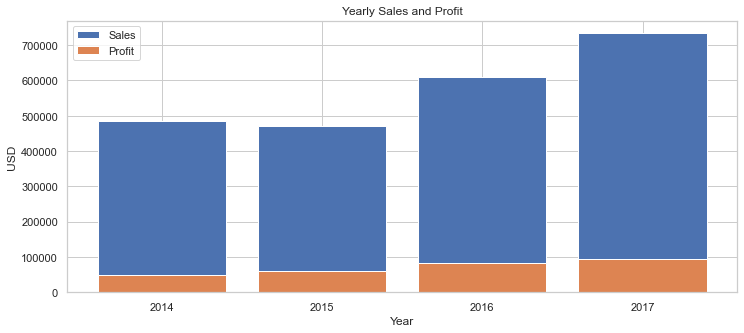

In [55]:
yearly = sales_data.groupby(['Order year'])[['Sales','Profit']].sum()

fig, sales_plot = plt.subplots(figsize=(12, 5))

sales_plot.set_xlabel('Year')
sales_plot.set_ylabel('USD')
sales_plot.bar(yearly.index, yearly['Sales'],tick_label = yearly.index)

profit_plot = sales_plot
profit_plot.bar(yearly.index, yearly['Profit'], tick_label = yearly.index)

plt.legend(['Sales','Profit'])
plt.gca().set_title('Yearly Sales and Profit')
plt.show()

### 11. Time Stamped analysis - Month and Day of Week

In [56]:
sales_data_inter=sales_data
sales_data_inter['DayofWeek'] = pd.to_datetime(sales_data['Order Date']).dt.day_name()
DayofWeek=sales_data_inter.groupby(['DayofWeek'])['Quantity','Gross Sales'].sum().sort_values('Quantity', ascending=True)
Month=sales_data_inter.groupby(['Order month'])['Quantity','Gross Sales'].sum().sort_values('Quantity', ascending=True)

/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/2334568564.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DayofWeek=sales_data_inter.groupby(['DayofWeek'])['Quantity','Gross Sales'].sum().sort_values('Quantity', ascending=True)
/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/2334568564.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Month=sales_data_inter.groupby(['Order month'])['Quantity','Gross Sales'].sum().sort_values('Quantity', ascending=True)


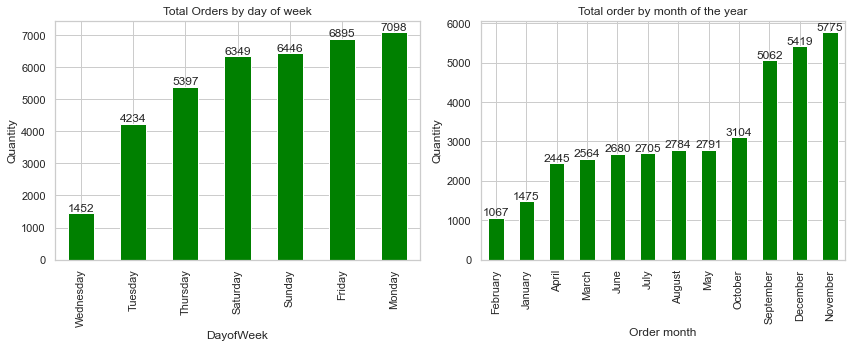

In [57]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1,2,1)
weekplot = DayofWeek['Quantity'].plot(kind='bar',color='green')
plt.gca().set_title ("Total Orders by day of week")
plt.gca().set_ylabel('Quantity')
plt.xticks(rotation = 90)
weekplot.bar_label(weekplot.containers[0])
# Plot Bar Plot for Best Selling Sub-Category
plt.subplot(1,2,2)
monthplot =  Month['Quantity'].plot(kind='bar',color='green')
plt.gca().set_ylabel('Quantity')
plt.gca().set_title ("Total order by month of the year")
plt.xticks(rotation = 90)
# Set spacing between subplots
figure.tight_layout()
monthplot.bar_label(monthplot.containers[0])
plt.show()



## 12. Cause and Effect (Profit and sales) for Texas

In [58]:
statewise=sales_data.groupby(['State'])['Gross Sales','Profit'].sum().reset_index()
statecategory=sales_data.groupby(['State','Category'])['Gross Sales','Profit'].sum().reset_index()
statecategory=statecategory.merge(statewise,how='left',on=['State'])
statecategory.columns=['State','Category','Gross Sales','Profit','Total_Gross','Total_Profit']
statecategory['GrossSales_contribution']=statecategory['Gross Sales']/statecategory['Total_Gross']
statecategory['Profit_Contribution']=statecategory['Profit']/statecategory['Total_Profit']

/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/3501432766.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  statewise=sales_data.groupby(['State'])['Gross Sales','Profit'].sum().reset_index()
/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/3501432766.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  statecategory=sales_data.groupby(['State','Category'])['Gross Sales','Profit'].sum().reset_index()


In [59]:
statewisecategory_pivot=statecategory.pivot(index=['State'],columns='Category',values=['GrossSales_contribution','Profit_Contribution']).reset_index()
a=statewisecategory_pivot[(statewisecategory_pivot['State'] == 'Texas') | (statewisecategory_pivot['State']=='California')]


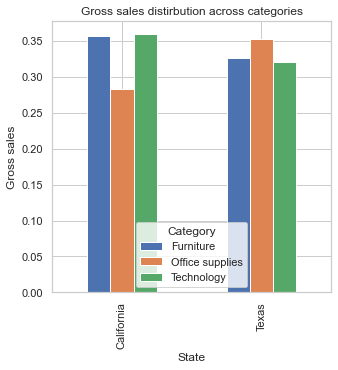

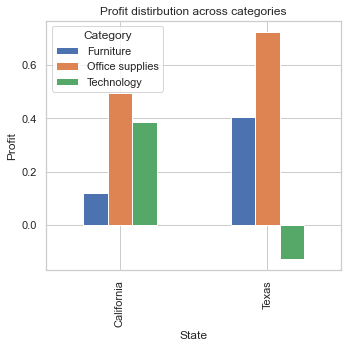

In [60]:
#figure, axis = plt.subplots(2, 1, figsize=(12, 5))

salesplot=a.plot(x="State", y=["GrossSales_contribution"], kind="bar")
plt.gca().set_title ("Gross sales distirbution across categories")
plt.gca().set_ylabel('Gross sales')
legend = plt.legend(['Furniture','Office supplies','Technology'], title = "Category")



salesplot=a.plot(x="State", y=["Profit_Contribution"], kind="bar")
plt.gca().set_title ("Profit distirbution across categories")
plt.gca().set_ylabel('Profit')
legend = plt.legend(['Furniture','Office supplies','Technology'], title = "Category")



plt.tight_layout()
plt.show()


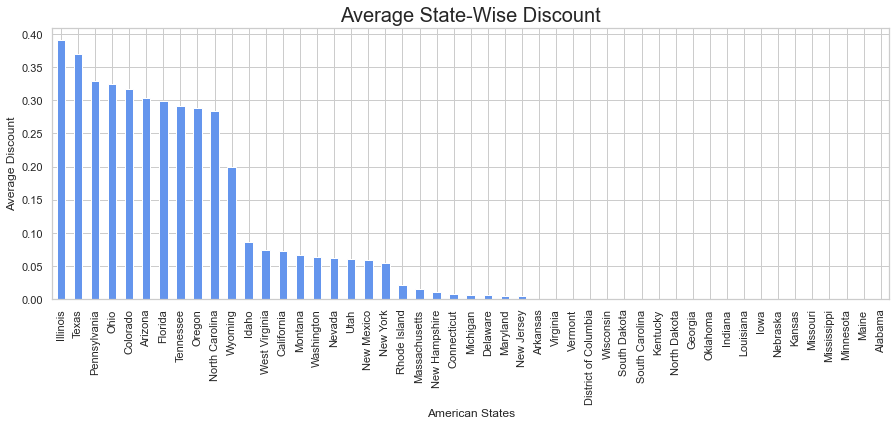

In [61]:
df_state_profit = sales_data.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

# 13. Deep Dive
#### Diving deeper into the profits and losses from state-wise sales, a sample of 6 states are chosen based on the categories of high profit, medium profit, low profit, low loss, medium loss, and high loss. Crucial trends are identified



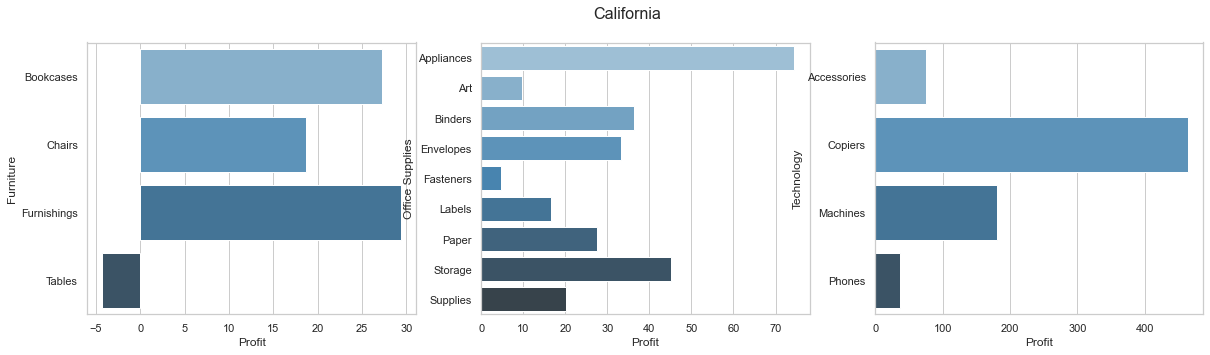

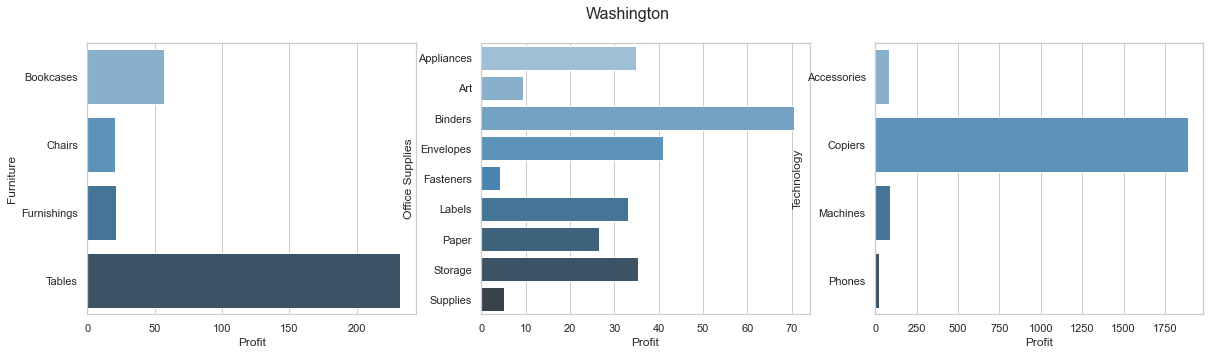

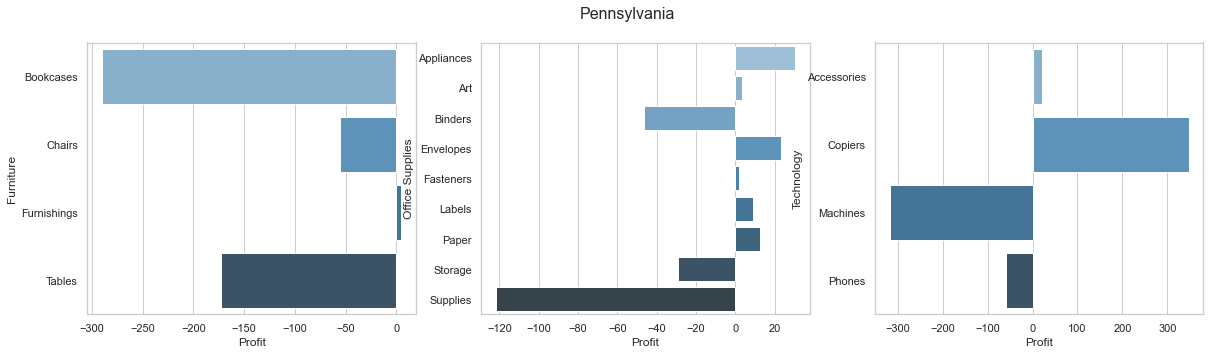

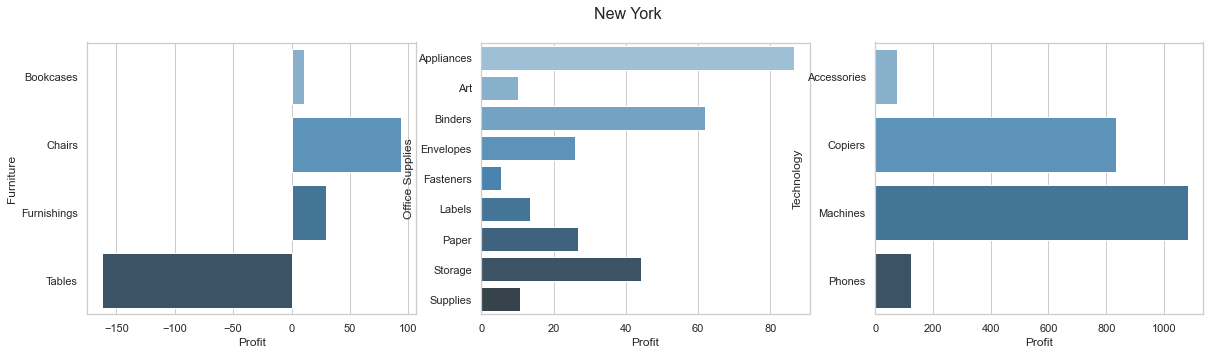

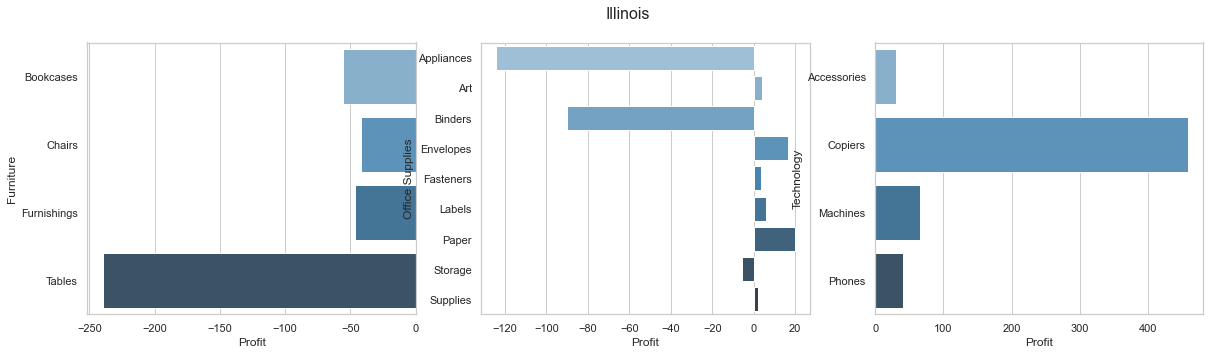

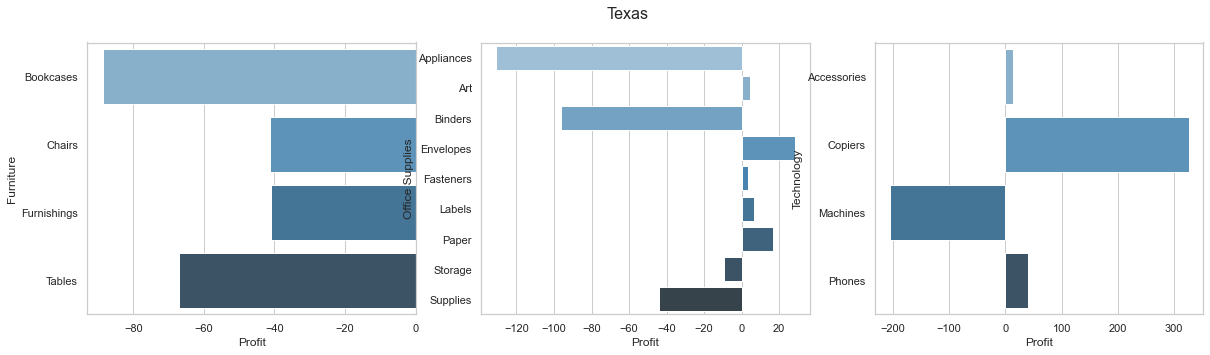

In [62]:
def state_data_viewer(states):
# plot profit of product categories and sub-categories for the chosen states
    product_data = sales_data.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (20, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot a chart for each category
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot sub-categories in each category
            category_data = data.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x = category_data.Profit, y = category_data.index, 
                        ax = ax[ax_index], palette = 'Blues_d')
            ax[ax_index].set_ylabel(category)
            ax_index += 1
# chosen States based on profit/loss categories
states = ['California', 'Washington', 'Pennsylvania', 'New York', 'Illinois', 'Texas']
state_data_viewer(states)

### Check for Normality

<Figure size 1080x576 with 0 Axes>

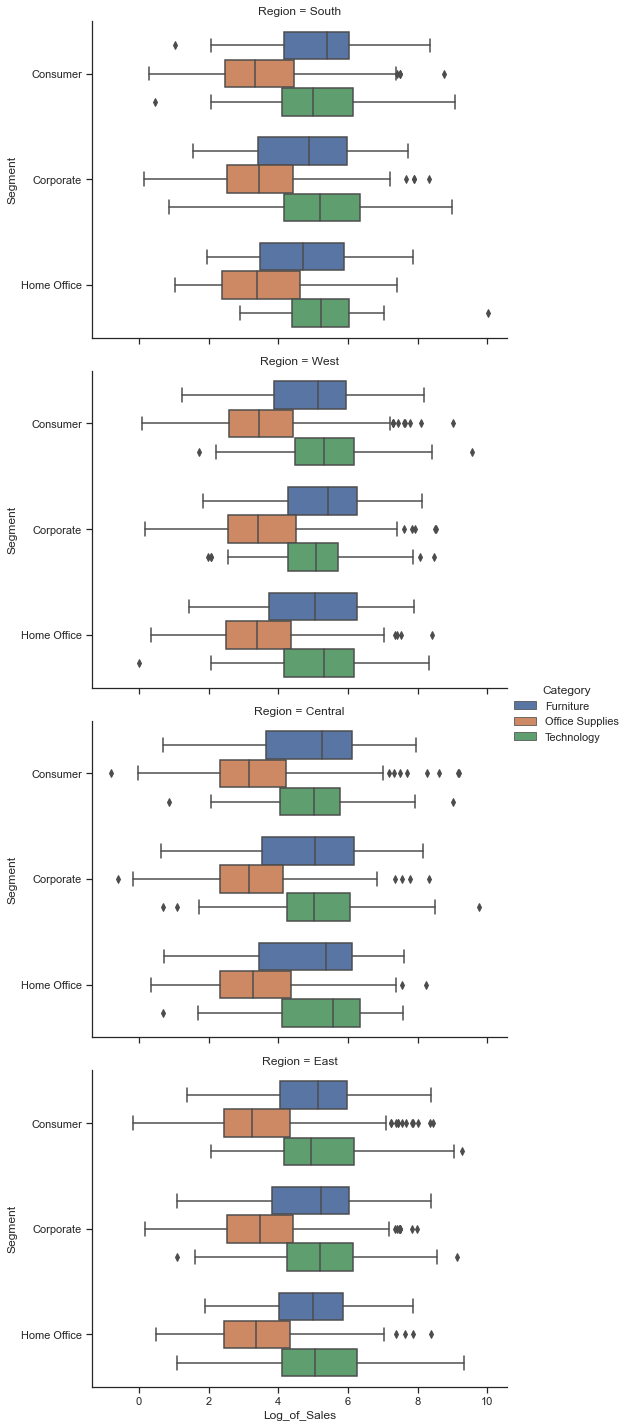

<Figure size 1080x576 with 0 Axes>

In [63]:
sales_data_inter2=sales_data
sales_data_inter2['Log_of_Sales'] = [np.log(s) for s in sales_data_inter2['Sales']]
sns.set_theme(style='ticks', color_codes=True)
sns.catplot(data=sales_data_inter2, x='Log_of_Sales', y='Segment', hue='Category', kind='box', row='Region', orient='h', aspect=1.5, height=5)

plt.figure(figsize = (15,8))


## 14. Check for Seasonality

In [64]:
sales_data_inter3=sales_data
sales_data_inter3['month'] = pd.to_datetime(sales_data['Order Date']).dt.month
dfp_trend = sales_data.groupby(['Order year','month']).sum()['Sales'].reset_index()
dfp_trend.columns=['year','month','Sales']
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dfp_trend[dfp_trend.year==2015]
sales_data

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,Profit,Population,Order month,Order year,Profit Margin %,Gross Sales,Unit Cost Price,DayofWeek,Log_of_Sales,month
0,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,...,41.91,3464802,November,2016,16.00,261.96,110.02,Tuesday,5.57,11
1,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,...,219.58,3464802,November,2016,30.00,731.94,170.79,Tuesday,6.60,11
2,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,...,6.87,30617582,June,2016,47.00,14.62,3.87,Sunday,2.68,6
3,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,...,-383.03,17247808,October,2015,-40.00,1741.05,487.49,Sunday,6.86,10
4,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,...,2.52,17247808,October,2015,11.25,27.96,12.41,Sunday,3.11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/14,1/23/14,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,...,4.10,17247808,January,2014,16.25,31.56,8.81,Tuesday,3.23,1
9990,2/26/17,3/3/17,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,...,15.63,30617582,February,2017,17.00,91.96,38.16,Sunday,4.52,2
9991,2/26/17,3/3/17,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,...,19.39,30617582,February,2017,7.50,323.22,149.49,Sunday,5.56,2
9992,2/26/17,3/3/17,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,...,13.32,30617582,February,2017,45.00,29.60,4.07,Sunday,3.39,2


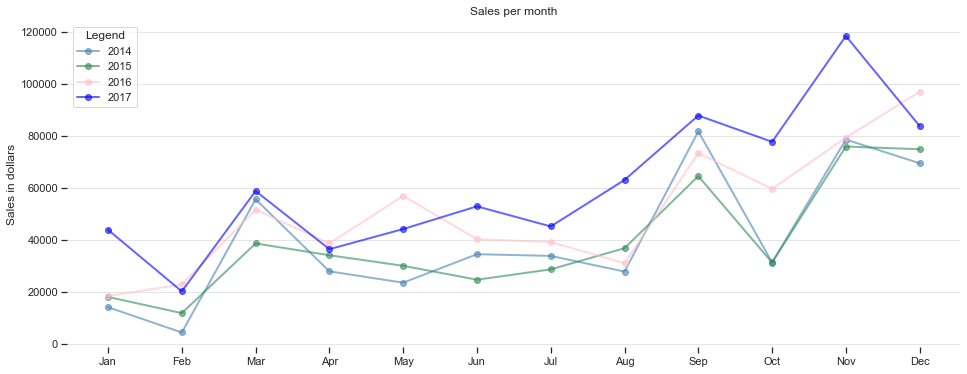

In [65]:
plt.figure(figsize=(16,6))
# Plot the sales of the year 2013
plt.plot(MONTHS, dfp_trend[dfp_trend.year==2014].Sales, '-o', color='steelblue', linewidth=2, alpha=0.6,label='2014')
plt.plot(MONTHS, dfp_trend[dfp_trend.year==2015].Sales, '-o', color='seagreen', linewidth=2, alpha=0.6,label='2015')
plt.plot(MONTHS, dfp_trend[dfp_trend.year==2016].Sales, '-o', color='pink', linewidth=2, alpha=0.6,label='2016')
plt.plot(MONTHS, dfp_trend[dfp_trend.year==2017].Sales, '-o', color='blue', linewidth=2, alpha=0.6,label='2017')

ax = plt.gca()
ax.set_title('Sales per month')
ax.set_ylabel('Sales in dollars')
ax.grid(axis='y', color='gray', alpha=.2)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend(loc=2, title='Legend')
plt.show()

<AxesSubplot:xlabel='Category', ylabel='count'>

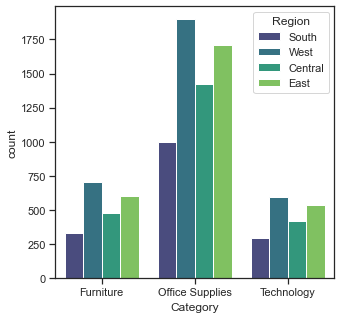

In [66]:
sns.countplot(data = sales_data , x = 'Category' , hue = 'Region'  , palette = 'viridis')

## 15. Heatmap

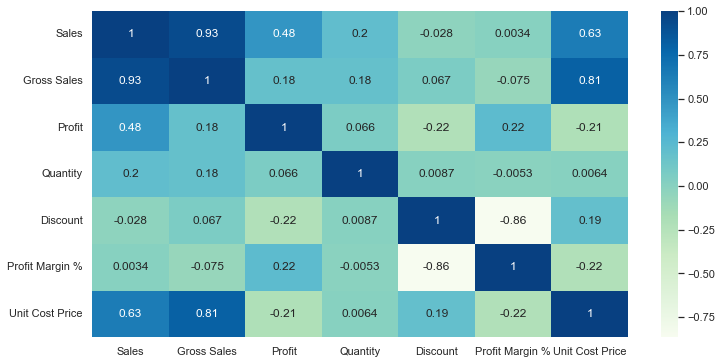

In [67]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = sales_data[['Sales','Gross Sales','Profit','Quantity','Discount','Profit Margin %','Unit Cost Price']].corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

## 16. Interaction with Discount

/Users/manojpadmaraju/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


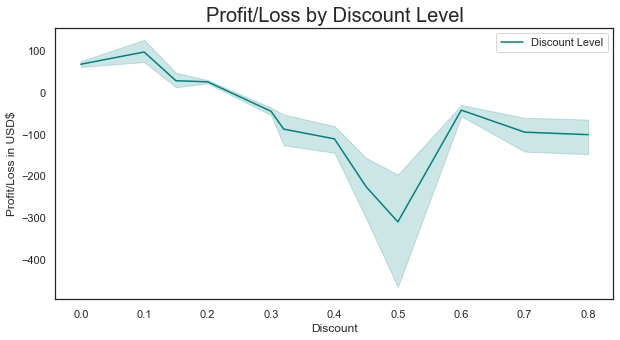

In [68]:
plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot('Discount', 'Profit', data = sales_data, color = 'Teal', label = 'Discount Level')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

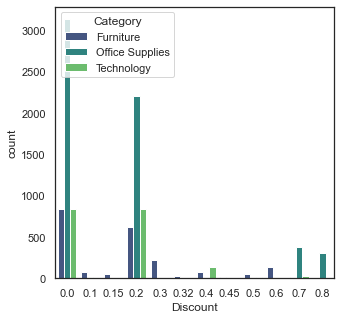

In [69]:
sns.countplot(data = sales_data , x = 'Discount' , hue = 'Category'  , palette = 'viridis')
sns.set(rc = {'figure.figsize':(10,10)})


## 17. Comparing discounted and non-discounted transactions and their average and total value

In [70]:
# transactions with Discount
sales_datad=sales_data
sales_datad['Unit Profit']  = sales_datad.Profit / sales_datad.Quantity
df_discounted = sales_datad[sales_datad['Discount'] > 0]

# transactions without Discount
df_no_discount = sales_datad[sales_datad['Discount'] == 0]

print ("On Average :")

print("Discounted Sales per transaction is USD$", round(df_discounted['Sales'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Sales'].mean(), 2))

print("Discounted Unit Price is USD$", round(df_discounted['Unit Cost Price'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Unit Cost Price'].mean(), 2))

print("Discounted Quantity purchased per transaction is ", round(df_discounted['Quantity'].mean(), 2), 
      ", without is ", round(df_no_discount['Quantity'].mean(), 2))
print("Discounted Profit per transaction is USD$", round(df_discounted['Profit'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Profit'].mean(), 2))

print("Discounted Unit Profit is USD$", round(df_discounted['Unit Profit'].mean(), 2), 
      ", without is USD$", round(df_no_discount['Unit Profit'].mean(), 2))

print(" ")

print ("In Total :")

print("Discounted Total Sales is USD$", round(df_discounted['Sales'].sum(), 2), 
      ", without is USD$", round(df_no_discount['Sales'].sum(), 2))

print("Discounted Total Quantity is ", round(df_discounted['Quantity'].sum(), 2), 
      ", without is ", round(df_no_discount['Quantity'].sum(), 2))

print("Discounted Total Profit is USD$", round(df_discounted['Profit'].sum(), 2), 
      ", without is USD$", round(df_no_discount['Profit'].sum(), 2))

On Average :
Discounted Sales per transaction is USD$ 232.73 , without is USD$ 226.74
Discounted Unit Price is USD$ 103.49 , without is USD$ 41.33
Discounted Quantity purchased per transaction is  3.77 , without is  3.81
Discounted Profit per transaction is USD$ -6.66 , without is USD$ 66.9
Discounted Unit Profit is USD$ -1.23 , without is USD$ 17.58
 
In Total :
Discounted Total Sales is USD$ 1209011.02 , without is USD$ 1087908.47
Discounted Total Quantity is  19604 , without is  18267
Discounted Total Profit is USD$ -34578.52 , without is USD$ 320987.6


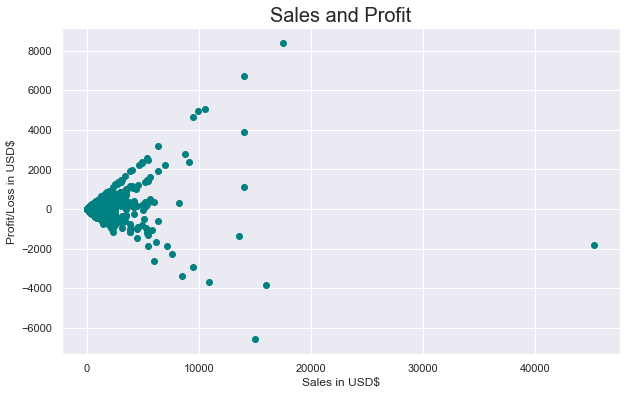

In [71]:
fig, ax = plt.subplots(figsize = (10, 6))
# scatterplot of Sales and Profit
ax.scatter(sales_data["Gross Sales"] , sales_data["Profit"], color = 'Teal')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

## OBJECTIVE SETTING (at state level) - Gross Sales and Quantity

### 1. Create an intrermediate dummy dataframe

In [72]:


sales_Data=sales_data.drop(['Unit Profit','Log_of_Sales','month'],inplace=True,axis=1)
sales_data_unique=sales_data.groupby(['Segment','State','Category','Order year']).sum().reset_index()
sales_data_unique.drop(['Postal Code','Sales','Discount','Unit Cost Price','Profit','Profit Margin %'], axis=1, inplace=True)
sales_data

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,...,Quantity,Discount,Profit,Population,Order month,Order year,Profit Margin %,Gross Sales,Unit Cost Price,DayofWeek
0,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,...,2,0.00,41.91,3464802,November,2016,16.00,261.96,110.02,Tuesday
1,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,...,3,0.00,219.58,3464802,November,2016,30.00,731.94,170.79,Tuesday
2,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,...,2,0.00,6.87,30617582,June,2016,47.00,14.62,3.87,Sunday
3,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,...,5,0.45,-383.03,17247808,October,2015,-40.00,1741.05,487.49,Sunday
4,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,...,2,0.20,2.52,17247808,October,2015,11.25,27.96,12.41,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/14,1/23/14,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,...,3,0.20,4.10,17247808,January,2014,16.25,31.56,8.81,Tuesday
9990,2/26/17,3/3/17,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,...,2,0.00,15.63,30617582,February,2017,17.00,91.96,38.16,Sunday
9991,2/26/17,3/3/17,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,...,2,0.20,19.39,30617582,February,2017,7.50,323.22,149.49,Sunday
9992,2/26/17,3/3/17,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,...,4,0.00,13.32,30617582,February,2017,45.00,29.60,4.07,Sunday


### 2. Input baseline year to be considered for History and Trend calculations

In [73]:
baseline_year=int(input("Please enter year to be considered for baseline calculations (2015 or 2016 or 2017): "))

Please enter year to be considered for baseline calculations (2015 or 2016 or 2017): 2017


### 3. Calculate Histroy component and its contribution for at the Segment-Category-State level

In [74]:
#calculate histroy and its contribution based on input for baseline period
primary_key_input=sales_data.loc[sales_data['Order year']==baseline_year]
primary_key_history=primary_key_input.groupby(['Segment','State','Category']).sum().reset_index()
primary_key_history.drop(['Order year','Postal Code','Discount','Profit','Unit Cost Price','Sales','Profit Margin %','Population'], axis=1, inplace=True)
primary_key_history_total=primary_key_history.groupby(['Segment','Category']).sum().reset_index()
primary_key_history_total.columns=['Segment','Category','Total_Quantity','Total_GrossSales']
primary_key_history_final=primary_key_history.merge(primary_key_history_total,how='left',on=['Segment','Category'])

primary_key_history_final[primary_key_history_final.Quantity.isnull()]
primary_key_history_final['Hist_contri_GrossSales']= primary_key_history_final['Gross Sales']/primary_key_history_final['Total_GrossSales']
primary_key_history_final['Hist_contri_Quantity']= primary_key_history_final['Quantity']/primary_key_history_final['Total_Quantity']
primary_key_history_final


,Segment,State,Category,Quantity,Gross Sales,Total_Quantity,Total_GrossSales,Hist_contri_GrossSales,Hist_contri_Quantity
0,Consumer,Alabama,Office Supplies,5,27.42,3922,147292.17,0.00,0.00
1,Consumer,Alabama,Technology,8,239.92,1141,123984.92,0.00,0.01
2,Consumer,Arizona,Furniture,20,2710.95,1219,138034.00,0.02,0.02
3,Consumer,Arizona,Office Supplies,74,1846.58,3922,147292.17,0.01,0.02
4,Consumer,Arizona,Technology,22,1540.80,1141,123984.92,0.01,0.02
...,...,...,...,...,...,...,...,...,...
315,Home Office,Washington,Office Supplies,114,2501.84,1471,51551.33,0.05,0.08
316,Home Office,Washington,Technology,37,7010.52,490,93646.39,0.07,0.08
317,Home Office,West Virginia,Office Supplies,15,536.48,1471,51551.33,0.01,0.01
318,Home Office,Wisconsin,Office Supplies,13,135.25,1471,51551.33,0.00,0.01


### 4. Calculate Untapped Potential component and its contribution for at the state level based on working population

In [75]:
#calculate untapped potential and its state-wise contribution
primary_key_UP=primary_key_history_final.merge(population,how='left',on=['State'])
population
primary_key_UP_total= primary_key_UP[['Segment','State','Category','Population']].groupby(['Segment','Category']).sum().reset_index()
primary_key_UP_total.columns=['Segment','Category','Total_population']
primary_key_UP_final=primary_key_UP.merge(primary_key_UP_total,how='left',on=['Segment','Category'])
primary_key_UP_final['UP_contri']=  primary_key_UP_final['Population'] /primary_key_UP_final['Total_population']                                      
primary_key_UP_final[['Segment','State','Category','Population','Total_population','UP_contri']]



,Segment,State,Category,Population,Total_population,UP_contri
0,Consumer,Alabama,Office Supplies,3814879,249142061,0.02
1,Consumer,Alabama,Technology,3814879,236744480,0.02
2,Consumer,Arizona,Furniture,5638481,235318569,0.02
3,Consumer,Arizona,Office Supplies,5638481,249142061,0.02
4,Consumer,Arizona,Technology,5638481,236744480,0.02
...,...,...,...,...,...,...
315,Home Office,Washington,Office Supplies,5951832,242289501,0.02
316,Home Office,Washington,Technology,5951832,215618196,0.03
317,Home Office,West Virginia,Office Supplies,1432580,242289501,0.01
318,Home Office,Wisconsin,Office Supplies,4555837,242289501,0.02


### 5. Perform Year on Year growth analysis for Gross sales and Quantity at a Segment-Category-State level

In [76]:
#calculate Trends and its contribution based on input for baseline period

primary_key_trend=sales_data_unique.pivot(index=['Segment','State','Category'],columns='Order year',values=['Gross Sales','Quantity']).reset_index()
primary_key_trend['Gross Sales'] = primary_key_trend['Gross Sales'].replace(np.nan, 0)
primary_key_trend['Quantity'] = primary_key_trend['Quantity'].replace(np.nan, 0)
#Growth rate calculation
primary_key_trend['GrossSalesGR (2016Vs2015)']= (primary_key_trend['Gross Sales'][2016]/primary_key_trend['Gross Sales'][2015])-1
primary_key_trend['GrossSalesGR (2017Vs2016)']= (primary_key_trend['Gross Sales'][2017]/primary_key_trend['Gross Sales'][2016])-1
primary_key_trend['QuantityGR (2016Vs2015)']= (primary_key_trend['Quantity'][2016]/primary_key_trend['Quantity'][2015])-1
primary_key_trend['QuantityGR (2017Vs2016)']= (primary_key_trend['Quantity'][2017]/primary_key_trend['Quantity'][2016])-1
#repalce Infs and NaNs
primary_key_trend['GrossSalesGR (2016Vs2015)']= primary_key_trend['GrossSalesGR (2016Vs2015)'].replace(np.nan, 0)
primary_key_trend['GrossSalesGR (2017Vs2016)']= primary_key_trend['GrossSalesGR (2017Vs2016)'].replace(np.nan, 0)
primary_key_trend['QuantityGR (2016Vs2015)']= primary_key_trend['QuantityGR (2016Vs2015)'].replace(np.nan, 0)
primary_key_trend['QuantityGR (2017Vs2016)']=primary_key_trend['QuantityGR (2017Vs2016)'].replace(np.nan, 0)

primary_key_trend['GrossSalesGR (2016Vs2015)']= primary_key_trend['GrossSalesGR (2016Vs2015)'].replace(np.inf, 0)
primary_key_trend['GrossSalesGR (2017Vs2016)']= primary_key_trend['GrossSalesGR (2017Vs2016)'].replace(np.inf, 0)
primary_key_trend['QuantityGR (2016Vs2015)']= primary_key_trend['QuantityGR (2016Vs2015)'].replace(np.inf, 0)
primary_key_trend['QuantityGR (2017Vs2016)']=primary_key_trend['QuantityGR (2017Vs2016)'].replace(np.inf, 0)
primary_key_trend

#compute Average
primary_key_trend['GrossSalesAVG'] = primary_key_trend[['GrossSalesGR (2016Vs2015)','GrossSalesGR (2017Vs2016)']].mean(axis=1)
primary_key_trend['QuantityAVG'] = primary_key_trend[['QuantityGR (2016Vs2015)','QuantityGR (2017Vs2016)']].mean(axis=1)
primary_key_trend




Segment          State         Category Gross Sales          \
Order year                                                     2014    2015   
0              Consumer        Alabama        Furniture     1828.82 1858.82   
1              Consumer        Alabama  Office Supplies      174.70  498.93   
2              Consumer        Alabama       Technology      180.93   59.97   
3              Consumer        Arizona        Furniture     1129.86 2556.05   
4              Consumer        Arizona  Office Supplies     4019.75 2079.75   
..                  ...            ...              ...         ...     ...   
383         Home Office  West Virginia  Office Supplies        0.00    0.00   
384         Home Office      Wisconsin        Furniture        0.00 1740.64   
385         Home Office      Wisconsin  Office Supplies      113.24  196.94   
386         Home Office      Wisconsin       Technology        0.00  999.96   
387         Home Office        Wyoming        Furniture        0.00    0.00   

                           Quantity                    \
Order year    2016    2017     2014  2015  2016  2017   
0           350.98    0.00    16.00  9.00  1.00  0.00   
1          1098.13   27.42    10.00  7.00 30.00  5.00   
2          1218.92  239.92     3.00  3.00 10.00  8.00   
3          2356.11 2710.95    16.00 31.00 14.00 20.00   
4           374.88 1846.58    64.00 96.00 31.00 74.00   
..             ...     ...      ...   ...   ...   ...   
383           0.00  536.48     0.00  0.00  0.00 15.00   
384          47.40    0.00     0.00 17.00  5.00  0.00   
385        1677.30  135.25    10.00 13.00 44.00 13.00   
386         175.94  399.95     0.00  4.00  6.00  5.00   
387        2003.92    0.00     0.00  0.00  4.00  0.00   

           GrossSalesGR (2016Vs2015) GrossSalesGR (2017Vs2016)  \
Order year                                                       
0                              -0.81                     -1.00   
1                               1.20                     -0.98   
2                              19.33                     -0.80   
3                              -0.08                      0.15   
4                              -0.82                      3.93   
..                               ...                       ...   
383                             0.00                      0.00   
384                            -0.97                     -1.00   
385                             7.52                     -0.92   
386                            -0.82                      1.27   
387                             0.00                     -1.00   

           QuantityGR (2016Vs2015) QuantityGR (2017Vs2016) GrossSalesAVG  \
Order year                                                                 
0                            -0.89                   -1.00         -0.91   
1                             3.29                   -0.83          0.11   
2                             2.33                   -0.20          9.26   
3                            -0.55                    0.43          0.04   
4                            -0.68                    1.39          1.55   
..                             ...                     ...           ...   
383                           0.00                    0.00          0.00   
384                          -0.71                   -1.00         -0.99   
385                           2.38                   -0.70          3.30   
386                           0.50                   -0.17          0.22   
387                           0.00                   -1.00         -0.50   

           QuantityAVG  
Order year              
0                -0.94  
1                 1.23  
2                 1.07  
3                -0.06  
4                 0.36  
..                 ...  
383               0.00  
384              -0.85  
385               0.84  
386               0.17  
387              -0.50  

[388 rows x 17 columns]

### 6. Compute Trend component and its contribution based on calculated Year on Year Average growth rates

In [77]:
#Calculate Trend component
GrowthRates=primary_key_trend[['Segment','State','Category','GrossSalesAVG','QuantityAVG']]

primary_key_HistUPTrend_final=primary_key_UP_final.merge(GrowthRates,how='left',on=['Segment','State','Category'])
primary_key_HistUPTrend_final.columns.values[-1]='QuantityAVG'
primary_key_HistUPTrend_final.columns.values[-2]='GrossSalesAVG'

primary_key_HistUPTrend_final['GrossSales_Trend']=primary_key_HistUPTrend_final['Gross Sales']*(1+primary_key_HistUPTrend_final.iloc[:,-2])
primary_key_HistUPTrend_final['Quantity_Trend']=primary_key_HistUPTrend_final['Quantity']*(1+primary_key_HistUPTrend_final['QuantityAVG'])
primary_key_HistUPTrend_final
Trend_total=primary_key_HistUPTrend_final[['Segment','Category','GrossSales_Trend','Quantity_Trend']].groupby(['Segment','Category']).sum().reset_index()
Trend_total.columns=['Segment','Category','GrossSales_Trend_Total','Quantity_Trend_Total']
primary_key_HistUPTrend_final=primary_key_HistUPTrend_final.merge(Trend_total,how='left',on=['Segment','Category'])
primary_key_HistUPTrend_final['GrossSales_Trend_contri']=primary_key_HistUPTrend_final['GrossSales_Trend']/primary_key_HistUPTrend_final['GrossSales_Trend_Total']
primary_key_HistUPTrend_final['Quantity_Trend_contri']=primary_key_HistUPTrend_final['Quantity_Trend']/primary_key_HistUPTrend_final['Quantity_Trend_Total']
primary_key_HistUPTrend_final

/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/214866979.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  primary_key_HistUPTrend_final=primary_key_UP_final.merge(GrowthRates,how='left',on=['Segment','State','Category'])
/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/214866979.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  primary_key_HistUPTrend_final=primary_key_UP_final.merge(GrowthRates,how='left',on=['Segment','State','Category'])


,Segment,State,Category,Quantity,Gross Sales,Total_Quantity,Total_GrossSales,Hist_contri_GrossSales,Hist_contri_Quantity,Population,Total_population,UP_contri,GrossSalesAVG,QuantityAVG,GrossSales_Trend,Quantity_Trend,GrossSales_Trend_Total,Quantity_Trend_Total,GrossSales_Trend_contri,Quantity_Trend_contri
0,Consumer,Alabama,Office Supplies,5,27.42,3922,147292.17,0.00,0.00,3814879,249142061,0.02,0.11,1.23,30.52,11.13,465489.62,6440.13,0.00,0.00
1,Consumer,Alabama,Technology,8,239.92,1141,123984.92,0.00,0.01,3814879,236744480,0.02,9.26,1.07,2461.86,16.53,338884.45,1659.19,0.01,0.01
2,Consumer,Arizona,Furniture,20,2710.95,1219,138034.00,0.02,0.02,5638481,235318569,0.02,0.04,-0.06,2809.06,18.80,217268.52,1636.92,0.01,0.01
3,Consumer,Arizona,Office Supplies,74,1846.58,3922,147292.17,0.01,0.02,5638481,249142061,0.02,1.55,0.36,4714.36,100.27,465489.62,6440.13,0.01,0.02
4,Consumer,Arizona,Technology,22,1540.80,1141,123984.92,0.01,0.02,5638481,236744480,0.02,0.79,1.84,2752.63,62.50,338884.45,1659.19,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Home Office,Washington,Office Supplies,114,2501.84,1471,51551.33,0.05,0.08,5951832,242289501,0.02,2.07,1.21,7673.48,252.23,388238.54,2647.08,0.02,0.10
316,Home Office,Washington,Technology,37,7010.52,490,93646.39,0.07,0.08,5951832,215618196,0.03,5.76,1.72,47387.45,100.75,523056.76,912.87,0.09,0.11
317,Home Office,West Virginia,Office Supplies,15,536.48,1471,51551.33,0.01,0.01,1432580,242289501,0.01,0.00,0.00,536.48,15.00,388238.54,2647.08,0.00,0.01
318,Home Office,Wisconsin,Office Supplies,13,135.25,1471,51551.33,0.00,0.01,4555837,242289501,0.02,3.30,0.84,581.40,23.92,388238.54,2647.08,0.00,0.01


### 7. Select required columns

In [78]:
primary_key_FINAL=primary_key_HistUPTrend_final[['Segment','State','Category','Gross Sales','Quantity','Hist_contri_GrossSales','Hist_contri_Quantity','UP_contri'
                                                 ,'GrossSales_Trend_contri','Quantity_Trend_contri']]
primary_key_FINAL

,Segment,State,Category,Gross Sales,Quantity,Hist_contri_GrossSales,Hist_contri_Quantity,UP_contri,GrossSales_Trend_contri,Quantity_Trend_contri
0,Consumer,Alabama,Office Supplies,27.42,5,0.00,0.00,0.02,0.00,0.00
1,Consumer,Alabama,Technology,239.92,8,0.00,0.01,0.02,0.01,0.01
2,Consumer,Arizona,Furniture,2710.95,20,0.02,0.02,0.02,0.01,0.01
3,Consumer,Arizona,Office Supplies,1846.58,74,0.01,0.02,0.02,0.01,0.02
4,Consumer,Arizona,Technology,1540.80,22,0.01,0.02,0.02,0.01,0.04
...,...,...,...,...,...,...,...,...,...,...
315,Home Office,Washington,Office Supplies,2501.84,114,0.05,0.08,0.02,0.02,0.10
316,Home Office,Washington,Technology,7010.52,37,0.07,0.08,0.03,0.09,0.11
317,Home Office,West Virginia,Office Supplies,536.48,15,0.01,0.01,0.01,0.00,0.01
318,Home Office,Wisconsin,Office Supplies,135.25,13,0.00,0.01,0.02,0.00,0.01


### 8. Calculate forecast at each Segment-Category level to be allocated at the state level

In [79]:
#Forecast Calulations
Forecast=primary_key_trend[['Segment','State','Category','Gross Sales','Quantity']]
Forecast=Forecast.groupby(['Segment','Category']).sum().reset_index()
Forecast['GrossSalesGR (2016Vs2015)']= (Forecast['Gross Sales'][2016]/Forecast['Gross Sales'][2015])-1
Forecast['GrossSalesGR (2017Vs2016)']= (Forecast['Gross Sales'][2017]/Forecast['Gross Sales'][2016])-1
Forecast['QuantityGR (2016Vs2015)']= (Forecast['Quantity'][2016]/Forecast['Quantity'][2015])-1
Forecast['QuantityGR (2017Vs2016)']= (Forecast['Quantity'][2017]/Forecast['Quantity'][2016])-1
Forecast['GrossSalesAVG'] = Forecast[['GrossSalesGR (2016Vs2015)','GrossSalesGR (2017Vs2016)']].mean(axis=1)
Forecast['QuantityAVG'] = Forecast[['QuantityGR (2016Vs2015)','QuantityGR (2017Vs2016)']].mean(axis=1)

GrowthRates_Nation=Forecast[['Segment','Category','GrossSalesAVG','QuantityAVG']]

Roll_up=primary_key_FINAL[['Segment','Category','Gross Sales','Quantity']]
Roll_up_nation=Roll_up.groupby(['Segment','Category']).sum().reset_index()
Roll_up_nation
Forecast_Calc=Roll_up_nation.merge(GrowthRates_Nation,how='left',on=['Segment','Category'])
Forecast_Calc.columns.values[-1]='QuantityAVG'
Forecast_Calc.columns.values[-2]='GrossSalesAVG'
Forecast_Calc
Forecast_Calc['GrossSales_Forecast']=Forecast_Calc['Gross Sales']*(1+Forecast_Calc.iloc[:,-2])
Forecast_Calc['Quantity_Forecast']=Forecast_Calc['Quantity']*(1+Forecast_Calc['QuantityAVG'])
Forecast_Calc

/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/1408605091.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Forecast=Forecast.groupby(['Segment','Category']).sum().reset_index()
/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/1408605091.py:16: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  Forecast_Calc=Roll_up_nation.merge(GrowthRates_Nation,how='left',on=['Segment','Category'])
/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/1408605091.py:16: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Forecast_Calc=Roll_up_nation.merge(GrowthRates_Nation,how='left',on=['Segment','Category'])


,Segment,Category,Gross Sales,Quantity,GrossSalesAVG,QuantityAVG,GrossSales_Forecast,Quantity_Forecast
0,Consumer,Furniture,138034.00,1219,0.07,0.14,147233.04,1388.72
1,Consumer,Office Supplies,147292.17,3922,0.22,0.26,179407.03,4943.36
2,Consumer,Technology,123984.92,1141,0.08,0.17,133383.25,1340.03
3,Corporate,Furniture,76010.99,743,0.26,0.19,95397.18,887.29
4,Corporate,Office Supplies,115499.86,2283,0.64,0.25,188892.81,2859.75
5,Corporate,Technology,112684.01,732,0.40,0.31,157454.29,960.70
6,Home Office,Furniture,56760.28,475,0.38,0.28,78190.88,607.03
7,Home Office,Office Supplies,51551.33,1471,0.52,0.38,78462.66,2025.79
8,Home Office,Technology,93646.39,490,0.93,0.52,180387.88,745.14


### 9. Consolidate History, Trend and Untapped potential components for each of the Segment-Category-State combinations

In [80]:
primary_key_FINAL=primary_key_FINAL.merge(Forecast_Calc[['Segment','Category','Quantity_Forecast','GrossSales_Forecast']],how='left', on=['Segment','Category'])


### 10. Input history, trend, Untapped potential weightage and Calculate the required objectives 

In [81]:
#Input history, trend and UP weights

histp=int(input("Weightage considered for history component: "))
trendsp=int(input("Weightage considered for trend component: "))
potp=int(input("Weightage considered for untapped potential component: "))

if (((histp+trendsp+potp)==100) or ((histp+trendsp)==100 and (potp==0))):
    primary_key_FINAL['SalesObjectives']=(((histp/100)*primary_key_FINAL['Hist_contri_GrossSales'])+((trendsp/100)*primary_key_FINAL['GrossSales_Trend_contri'])+((potp/100)*primary_key_FINAL['UP_contri']))*primary_key_FINAL['GrossSales_Forecast']
    primary_key_FINAL['QuantityObjectives']=(((histp/100)*primary_key_FINAL['Hist_contri_Quantity'])+((trendsp/100)*primary_key_FINAL['Quantity_Trend_contri'])+((potp/100)*primary_key_FINAL['UP_contri']))*primary_key_FINAL['Quantity_Forecast'] 
else:                                          
    Print('The sum of weights must be 100')


Weightage considered for history component: 50
Weightage considered for trend component: 30
Weightage considered for untapped potential component: 20


### 12. Export final Output

In [82]:
primary_key_FINAL.to_excel("ObjectivesFinal.xlsx")

In [83]:
primary_key_FINAL

,Segment,State,Category,Gross Sales,Quantity,Hist_contri_GrossSales,Hist_contri_Quantity,UP_contri,GrossSales_Trend_contri,Quantity_Trend_contri,Quantity_Forecast,GrossSales_Forecast,SalesObjectives,QuantityObjectives
0,Consumer,Alabama,Office Supplies,27.42,5,0.00,0.00,0.02,0.00,0.00,4943.36,179407.03,569.65,20.85
1,Consumer,Alabama,Technology,239.92,8,0.00,0.01,0.02,0.01,0.01,1340.03,133383.25,849.61,13.02
2,Consumer,Arizona,Furniture,2710.95,20,0.02,0.02,0.02,0.01,0.01,1388.72,147233.04,2722.45,22.83
3,Consumer,Arizona,Office Supplies,1846.58,74,0.01,0.02,0.02,0.01,0.02,4943.36,179407.03,2481.75,92.10
4,Consumer,Arizona,Technology,1540.80,22,0.01,0.02,0.02,0.01,0.04,1340.03,133383.25,1789.18,34.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Home Office,Washington,Office Supplies,2501.84,114,0.05,0.08,0.02,0.02,0.10,2025.79,78462.66,2754.67,146.36
316,Home Office,Washington,Technology,7010.52,37,0.07,0.08,0.03,0.09,0.11,745.14,180387.88,12650.72,56.92
317,Home Office,West Virginia,Office Supplies,536.48,15,0.01,0.01,0.01,0.00,0.01,2025.79,78462.66,533.58,16.17
318,Home Office,Wisconsin,Office Supplies,135.25,13,0.00,0.01,0.02,0.00,0.01,2025.79,78462.66,433.25,22.06


### 13. Comparison of forecasted sales and quantity with previous year sales

In [84]:
primary_key_FINAL_groupby=primary_key_FINAL.groupby(['Segment','State','Category'])[['SalesObjectives','QuantityObjectives']].sum().reset_index()
primary_key_FINAL_groupby['Order year']='2018 Forecast'
primary_key_FINAL_groupby.columns=['Segment','State','Category','Gross Sales','Quantity','Order year']
primary_key_FINAL_groupby

,Segment,State,Category,Gross Sales,Quantity,Order year
0,Consumer,Alabama,Office Supplies,569.65,20.85,2018 Forecast
1,Consumer,Alabama,Technology,849.61,13.02,2018 Forecast
2,Consumer,Arizona,Furniture,2722.45,22.83,2018 Forecast
3,Consumer,Arizona,Office Supplies,2481.75,92.10,2018 Forecast
4,Consumer,Arizona,Technology,1789.18,34.45,2018 Forecast
...,...,...,...,...,...,...
315,Home Office,Washington,Office Supplies,2754.67,146.36,2018 Forecast
316,Home Office,Washington,Technology,12650.72,56.92,2018 Forecast
317,Home Office,West Virginia,Office Supplies,533.58,16.17,2018 Forecast
318,Home Office,Wisconsin,Office Supplies,433.25,22.06,2018 Forecast


In [85]:
sales_groupby= sales_data.groupby(['Segment','State','Category','Order year'])['Gross Sales','Quantity'].sum().reset_index()
sales_groupby

/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/232436747.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_groupby= sales_data.groupby(['Segment','State','Category','Order year'])['Gross Sales','Quantity'].sum().reset_index()


,Segment,State,Category,Order year,Gross Sales,Quantity
0,Consumer,Alabama,Furniture,2014,1828.82,16
1,Consumer,Alabama,Furniture,2015,1858.82,9
2,Consumer,Alabama,Furniture,2016,350.98,1
3,Consumer,Alabama,Office Supplies,2014,174.70,10
4,Consumer,Alabama,Office Supplies,2015,498.93,7
...,...,...,...,...,...,...
1140,Home Office,Wisconsin,Office Supplies,2017,135.25,13
1141,Home Office,Wisconsin,Technology,2015,999.96,4
1142,Home Office,Wisconsin,Technology,2016,175.94,6
1143,Home Office,Wisconsin,Technology,2017,399.95,5


In [86]:
sales_combined = sales_groupby.append(primary_key_FINAL_groupby)
sales_combined

/var/folders/2j/407qmr0n47q4_kncxmwwc0ww0000gn/T/ipykernel_98046/3891468501.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_combined = sales_groupby.append(primary_key_FINAL_groupby)


,Segment,State,Category,Order year,Gross Sales,Quantity
0,Consumer,Alabama,Furniture,2014,1828.82,16.00
1,Consumer,Alabama,Furniture,2015,1858.82,9.00
2,Consumer,Alabama,Furniture,2016,350.98,1.00
3,Consumer,Alabama,Office Supplies,2014,174.70,10.00
4,Consumer,Alabama,Office Supplies,2015,498.93,7.00
...,...,...,...,...,...,...
315,Home Office,Washington,Office Supplies,2018 Forecast,2754.67,146.36
316,Home Office,Washington,Technology,2018 Forecast,12650.72,56.92
317,Home Office,West Virginia,Office Supplies,2018 Forecast,533.58,16.17
318,Home Office,Wisconsin,Office Supplies,2018 Forecast,433.25,22.06


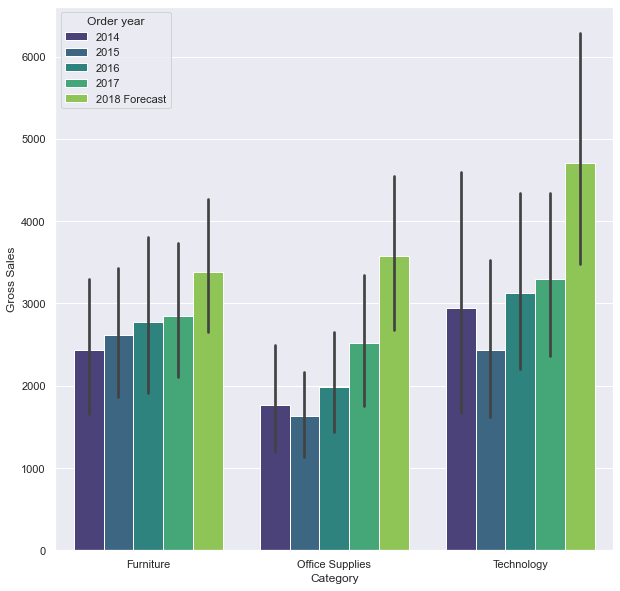

In [87]:
#sales_combined.groupby(['Order year','Category'])[['Gross Sales']].sum().plot.bar(figsize=(15,5))
#plt.ylabel('Gross Sales')
sns.barplot(data = sales_combined , x = 'Category' , y= 'Gross Sales',hue = 'Order year'  , palette = 'viridis')
sns.set(rc = {'figure.figsize':(8,8)})


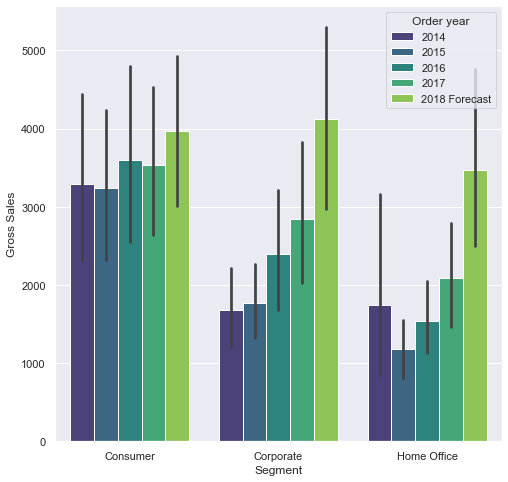

In [88]:
sns.barplot(data = sales_combined , x = 'Segment', y='Gross Sales' , hue = 'Order year'  , palette = 'viridis')
sns.set(rc = {'figure.figsize':(10,10)})

Text(0, 0.5, 'Gross Sales - 2018')

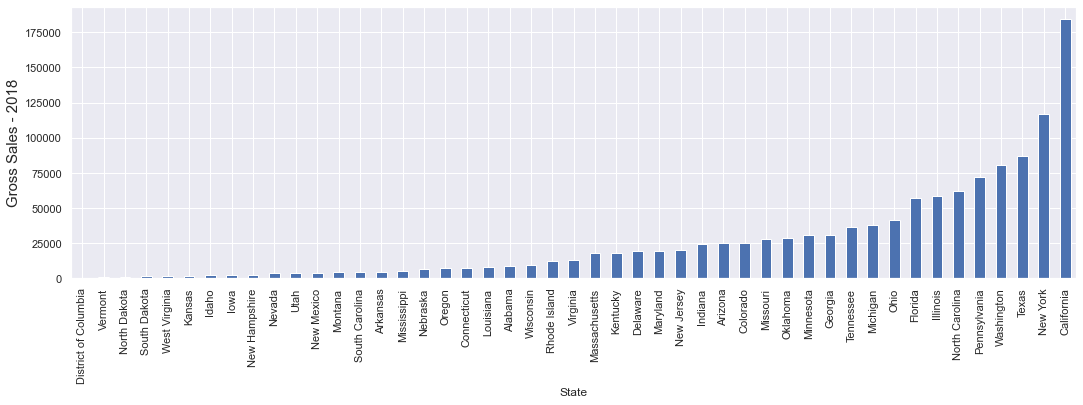

In [89]:
primary_key_FINAL_groupby.groupby(['State']).sum()['Gross Sales'].sort_values().plot(kind='bar', figsize=(18,5))
plt.ylabel('Gross Sales - 2018',fontsize=15)

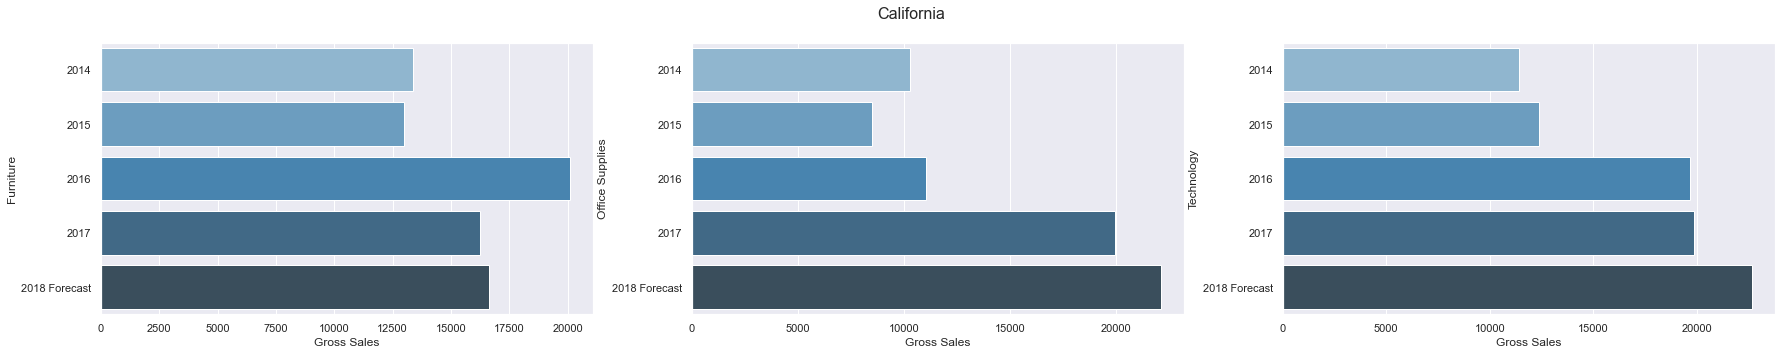

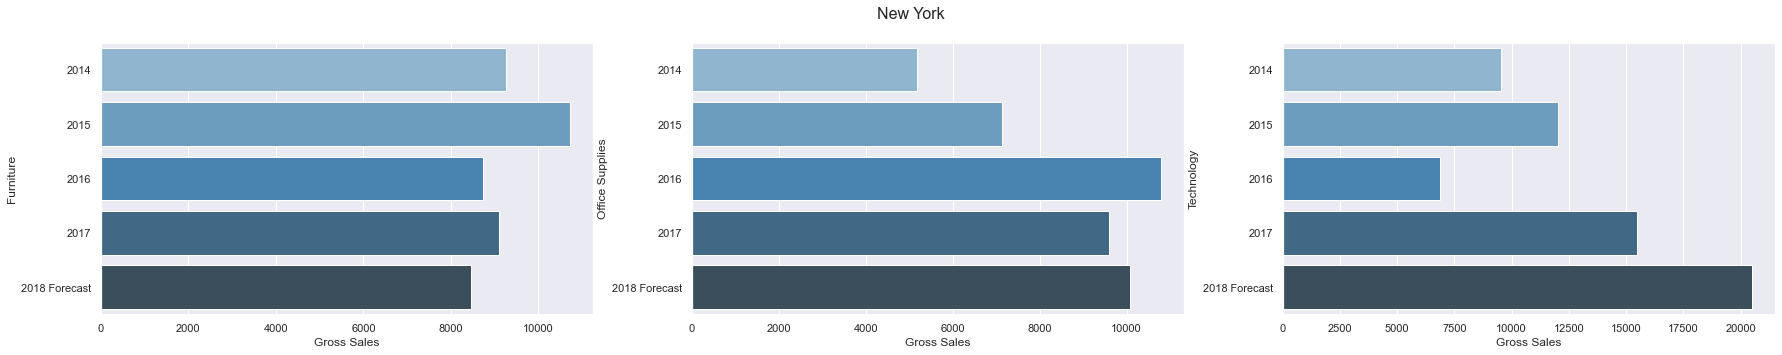

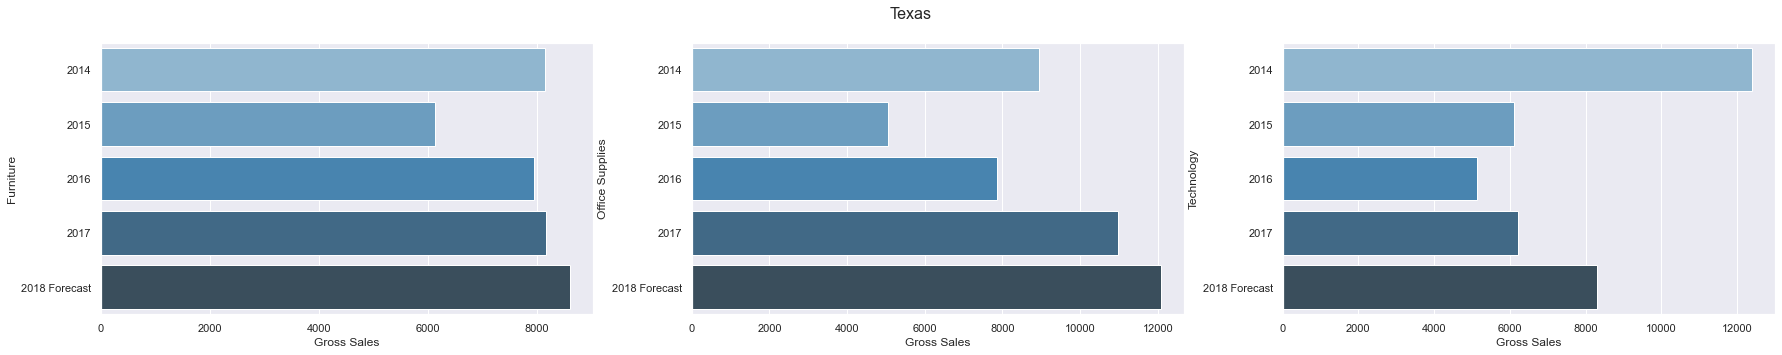

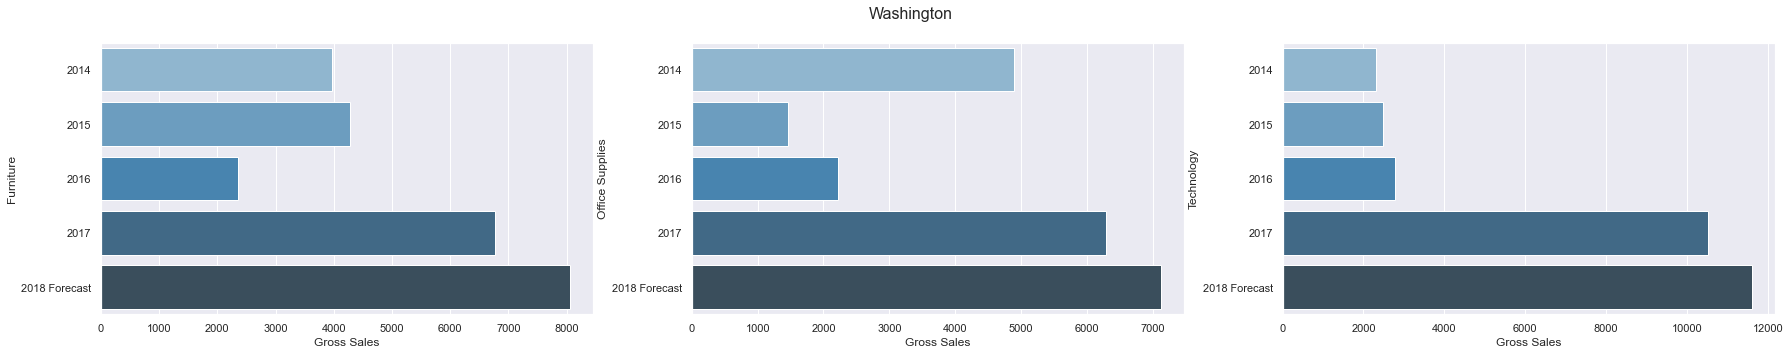

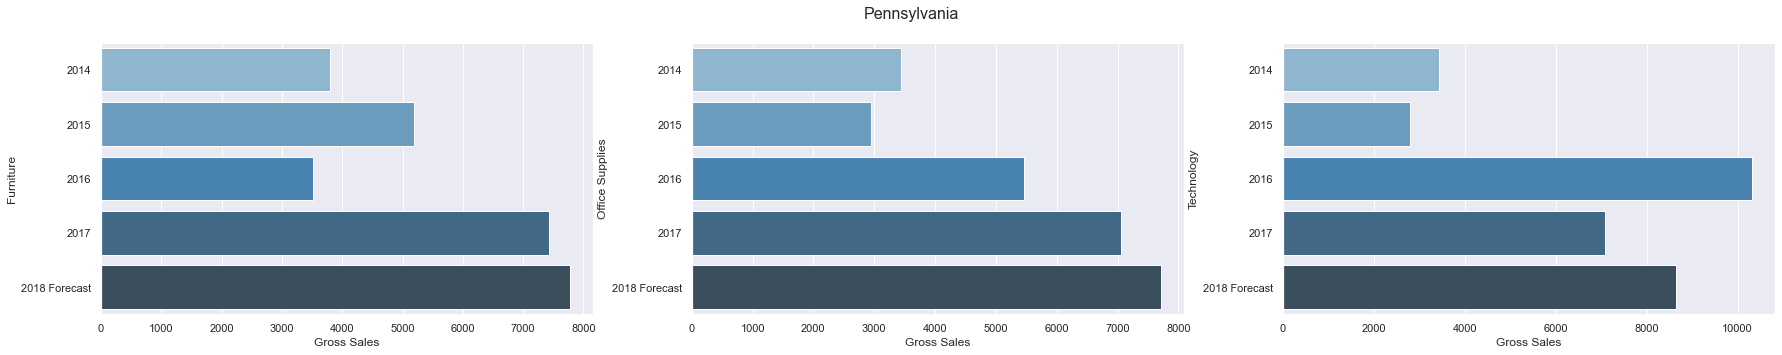

In [90]:
def state_data_viewer(states):
# plot profit of product categories and sub-categories for the chosen states
    product_data = sales_combined.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot a chart for each category
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot sub-categories in each category
            category_data = data.get_group(category).groupby(['Order year']).mean()
            sns.barplot(x = category_data['Gross Sales'], y = category_data.index, 
                        ax = ax[ax_index], palette = 'Blues_d')
            ax[ax_index].set_ylabel(category)
            ax_index += 1
# chosen States based on profit/loss categories
states = ['California', 'New York','Texas','Washington', 'Pennsylvania']
state_data_viewer(states)